In [1]:
# Imports
import os
import sys
import glob
import re

# Third party imports
import numpy as np
import xarray as xr
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
# Import dictionaries
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dict

# Import functions
import functions as func

# Import the NAO functions
import nao_skill_functions as nao_func

# Import nao matching functions
sys.path.append('/home/users/benhutch/skill-maps/rose-suite-matching')
from nao_matching_seasons import match_variable_models, find_obs_path

### NAO skill exploration ###

* Create a subplot with 6 rows and 2 columns, containing the NAO 8-year running means (years 2-9 forecast) for psl.
* Shift the x-axis to be aligned with initialisation year
* Grab as many years as possible (final 8 year running mean for obs 2016-2023 inclusive)
* Present in terms of long region and short region
* Also consider temperature of subpolar gyre for different models

In [3]:
# Set up the arguments for psl
psl_models = dict.models
obs_path_psl = dict.obs
base_dir = dict.base_dir
plots_dir = "/gws/nopw/j04/canari/users/benhutch/plots/NAO_skill"
save_dir = dict.save_dir # Where the NAO-matched data are saved
global_grid = dict.gridspec_global
psl_var_name = "psl"

In [4]:
# Process the global psl anomalies to be used for the NAO index
obs_psl_anom = func.read_obs(variable='psl',
                            region='global',
                            forecast_range='2-9',
                            season="DJFM",
                            observations_path=obs_path_psl,
                            start_year=1960,
                            end_year=2023)

Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [5]:
# Load and process the model psl anomalies to be used for the NAO index
model_datasets_psl = func.load_data(base_directory=base_dir,
                                    models=psl_models,
                                    variable=psl_var_name,
                                    region='global',
                                    forecast_range='2-9',
                                    season="DJFM")

# Process the model psl anomalies to be used for the NAO index
model_psl_anom, _ = func.process_data(datasets_by_model=model_datasets_psl,
                                    variable=psl_var_name)

In [6]:
# Remove years containing NaNs from the obs and model datasets
obs_psl_anom, \
model_data_psl, _ = func.remove_years_with_nans_nao(observed_data=obs_psl_anom,
                                                    model_data=model_psl_anom,
                                                    models=psl_models,
                                                    NAO_matched=False)

No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN v

In [7]:
print("model nao:", model_data_psl)

model nao: {'BCC-CSM2-MR': [<xarray.DataArray 'psl' (time: 54, lat: 72, lon: 144)>
dask.array<open_dataset-b206702938a6823e1230ea2397431ce1psl, shape=(54, 72, 144), dtype=float32, chunksize=(50, 72, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1966-08-01 00:00:00 ... 2019-08-01 00:00:00
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
Attributes:
    CDI:                    Climate Data Interface version 2.0.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 BCC-CSM 2 MR (2017):   aerosol: none  atmos: BCC_...
    institution:            Beijing Climate Center, Beijing 100081, China
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                The model 10-year-long hindcast integration start...
    contact:        

In [8]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict


In [9]:
# test the new function
nao_stats_dict = nao_stats(obs_psl=obs_psl_anom,
                        hindcast_psl=model_data_psl,
                        models_list=psl_models,
                        lag=4,
                        short_period=(1965, 2010),
                        season="DJFM")

Setting up the NAO stats for the BCC-CSM2-MR model
model number: 0


The years in the observations are not the same as the years in the hindcast data for the BCC-CSM2-MR model
Obs first year: 1965
Hindcast first year: 1966
Obs last year: 2019
Hindcast last year: 2019
years checking complete for the observations and the BCC-CSM2-MR model
years_short: [1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010]
nao_members shape: (8, 54)
nao_members_short shape: (8, 45)
nao_member shape: (54,)
nao_member_short shape: (45,)
nao_members shape: (8, 54)
nao_members_short shape: (8, 45)
nao_member shape: (54,)
nao_member_short shape: (45,)
nao_members shape: (8, 54)
nao_members_short shape: (8, 45)
nao_member shape: (54,)
nao_member_short shape: (45,)
nao_members shape: (8, 54)
nao_members_short shape: (8, 45)
nao_member shape: (54,)
nao_member_short shape: (45,)
nao_members shape: (8, 54)
nao_

In [10]:
print(nao_stats_dict['NorCPM1']['model_nao_ts_short_max'])

[281.56160889 409.5734375  434.87177124 325.32126312 377.11216125
 485.04417114 294.21824341 327.22789154 217.80231781 415.00263367
 325.67597656 369.19693909 303.66878204 275.21725464 272.34604797
 213.76314468 202.05985794 318.37583008 231.94996033 235.9326828
 216.97339249 244.73343048 383.61463165 399.66721039 433.25358734
 293.8491272  172.14373398 407.84489594 306.89427032 338.66097717
 258.10544586 363.16845703 191.94739609 474.06601563 271.7392746
 477.13045044 358.94806976 399.63188477 363.71525116 301.97325134
 399.58603516 315.83442078 305.01750946 225.98646317 308.43008728
 374.90865173]


In [11]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict


Plotting the short period
Plotting the raw NAO index


Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the short period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index extracted for member 7
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the short period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index e

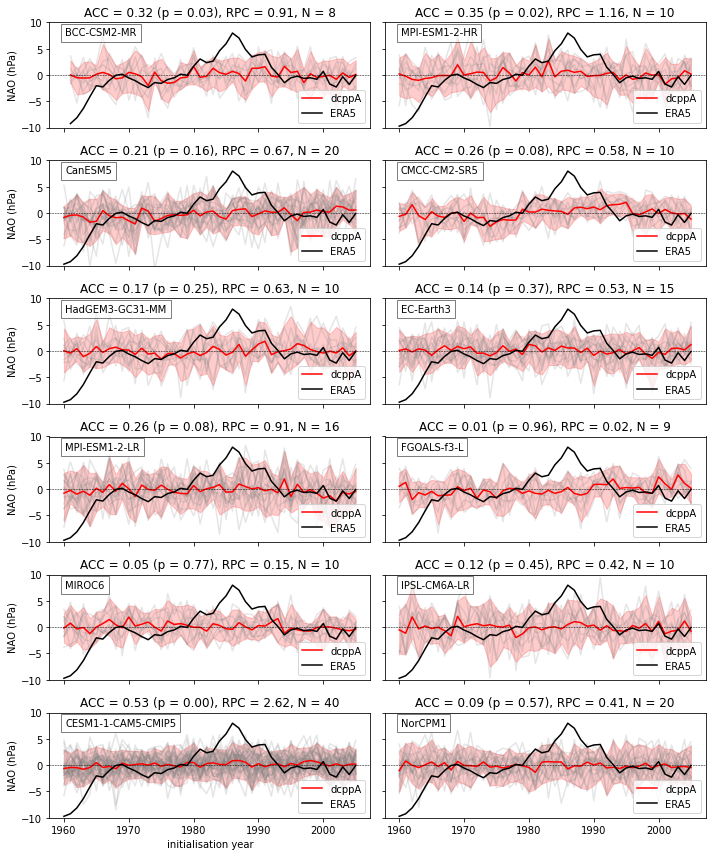

In [12]:
# test the new plotting function
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict,
                        models_list=psl_models,
                        short_period=True,
                        lag_and_var_adjust=False)

Plotting the long period
Plotting the raw NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the long period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index extracted for member 7
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the long period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index ex

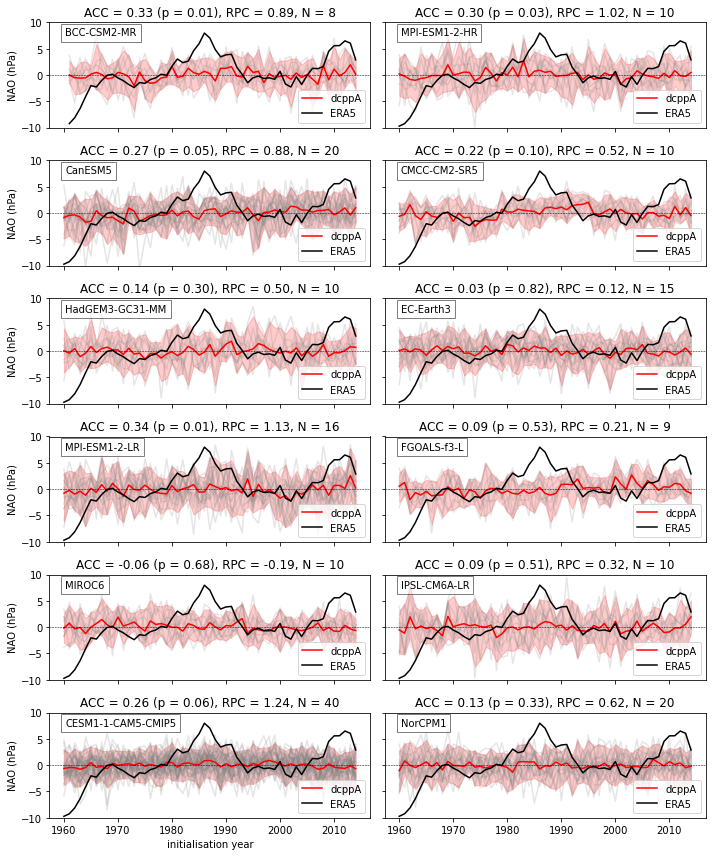

In [13]:
# Now for the raw plot, but for the long period
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict,
                        models_list=psl_models,
                        short_period=False,
                        lag_and_var_adjust=False)

Plotting the short period
Plotting the lag and variance adjusted NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the CanESM5 model
At index 2 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the CMCC-CM2-SR5 model
At index 3 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the HadGEM3-GC31-MM model
At index 4 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the EC-Earth3 model
At index 5 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-LR model
At index 6 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the FGOALS-f3-L model
At index 7 of the axes


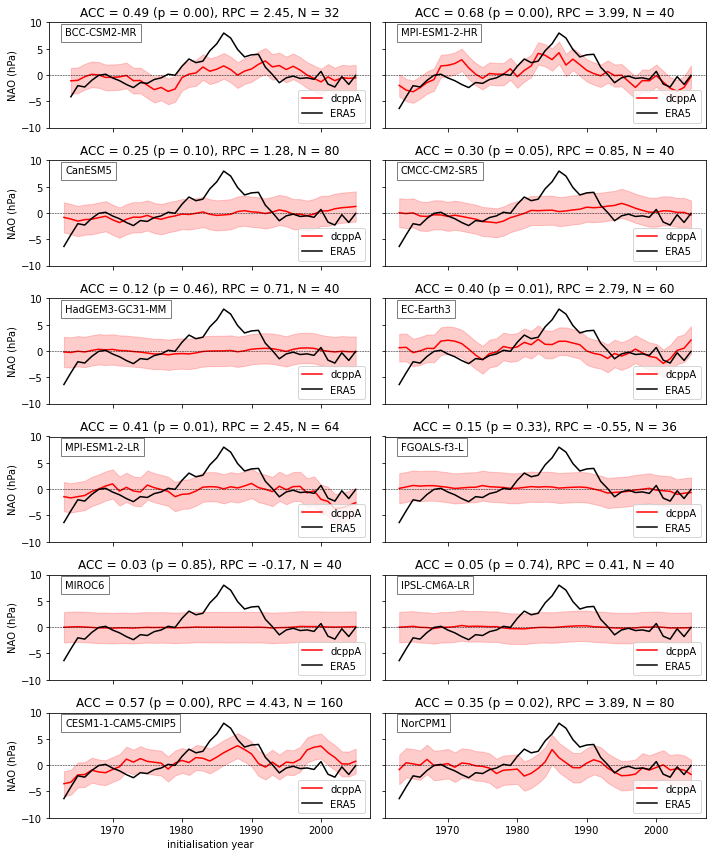

In [14]:
# Now for the short period, but with the lag and variance adjustment
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict,
                        models_list=psl_models,
                        short_period=True,
                        lag_and_var_adjust=True)

Plotting the long period
Plotting the lag and variance adjusted NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the CanESM5 model
At index 2 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the CMCC-CM2-SR5 model
At index 3 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the HadGEM3-GC31-MM model
At index 4 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the EC-Earth3 model
At index 5 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-LR model
At index 6 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the FGOALS-f3-L model
At index 7 of the axes
Plotting

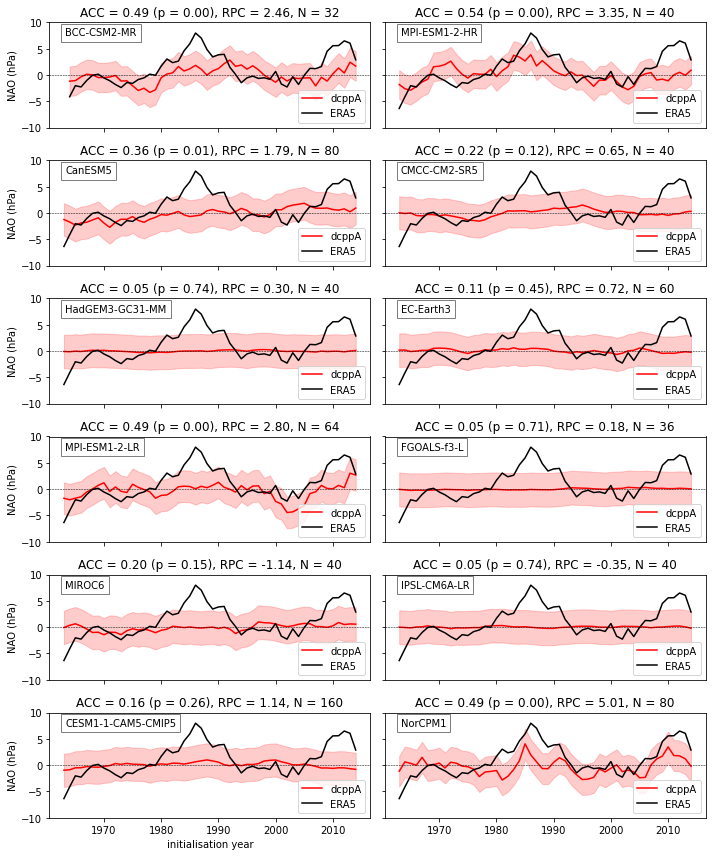

In [15]:
# Now for the long period, but with the lag and variance adjustment
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict,
                        models_list=psl_models,
                        short_period=False,
                        lag_and_var_adjust=True)

In [16]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models, plot_multi_model_mean

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict

Plotting the raw NAO index
Extracting ensemble members from the BCC-CSM2-MR model
Extracting members for the raw NAO index
Extracting member 0
NAO index extracted for member 0
NAO index extracted for short period for member 0
Extracting member 1
NAO index extracted for member 1
NAO index extracted for short period for member 1
Extracting member 2
NAO index extracted for member 2
NAO index extracted for short period for member 2
Extracting member 3
NAO index extracted for member 3
NAO index extracted for short period for member 3
Extracting member 4
NAO index extracted for member 4
NAO index extracted for short period for member 4
Extracting member 5
NAO index extracted for member 5
NAO index extracted for short period for member 5
Extracting member 6
NAO index extracted for member 6
NAO index extracted for short period for member 6
Extracting member 7
NAO index extracted for member 7
NAO index extracted for short period for member 7
Extracting ensemble members from the MPI-ESM1-2-HR mo

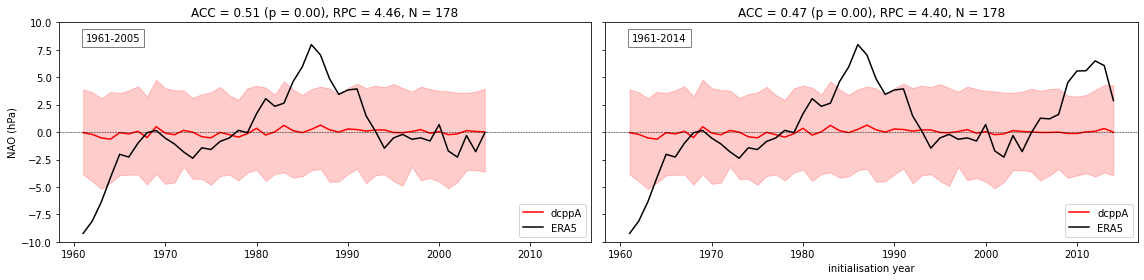

In [17]:
# Plot the raw multi-model mean
plot_multi_model_mean(nao_stats_dict=nao_stats_dict,
                    models_list=psl_models,
                    lag_and_var_adjust=False)

Plotting the lag and variance adjusted NAO index
Extracting ensemble members from the BCC-CSM2-MR model
Extracting members for the lag and variance adjusted NAO index
Extracting member 0
NAO index extracted for member 0
NAO index extracted for short period for member 0
Extracting member 1
NAO index extracted for member 1
NAO index extracted for short period for member 1
Extracting member 2
NAO index extracted for member 2
NAO index extracted for short period for member 2
Extracting member 3
NAO index extracted for member 3
NAO index extracted for short period for member 3
Extracting member 4
NAO index extracted for member 4
NAO index extracted for short period for member 4
Extracting member 5
NAO index extracted for member 5
NAO index extracted for short period for member 5
Extracting member 6
NAO index extracted for member 6
NAO index extracted for short period for member 6
Extracting member 7
NAO index extracted for member 7
NAO index extracted for short period for member 7
Extractin

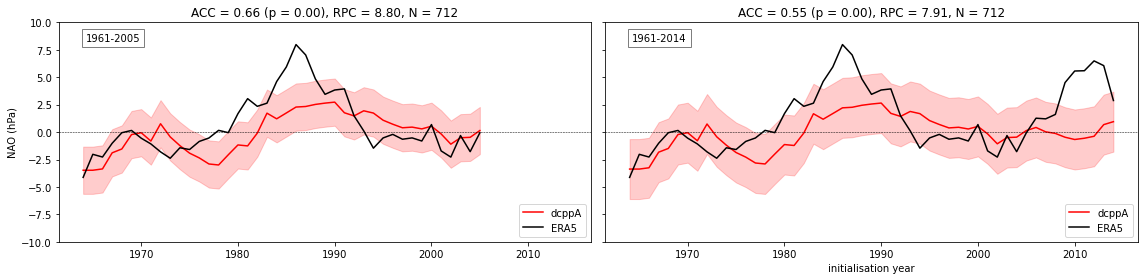

In [18]:
# Plot the lagged and variance-adjusted multi-model mean
plot_multi_model_mean(nao_stats_dict=nao_stats_dict,
                    models_list=psl_models,
                    lag_and_var_adjust=True)

In [4]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models, plot_multi_model_mean

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict

psl_models_noCan = dict.psl_models

# Import the functions again
importlib.reload(sys.modules['functions'])

# Import the functions again
import functions as func

In [5]:
# Now for years 2-5
obs_psl_anom_2_5 = func.read_obs(variable='psl',
                                region='global',
                                forecast_range='2-5',
                                season="DJFM",
                                observations_path=obs_path_psl,
                                start_year=1960,
                                end_year=2023)

Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [6]:
# Load and process the years 2-5 model psl anomalies to be used for the NAO index
model_datasets_psl_2_5 = func.load_data(base_directory=base_dir,
                                        models=psl_models,
                                        variable=psl_var_name,
                                        region='global',
                                        forecast_range='2-5',
                                        season="DJFM")

# Process the model psl anomalies to be used for the NAO index
model_psl_anom_2_5, _ = func.process_data(datasets_by_model=model_datasets_psl_2_5,
                                        variable=psl_var_name)

Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/years_2-5/DJFM/outputs/mergetime/mergetime_CanESM5_psl_global_2-5_DJFM-r8i1.nc: [1963 1964 1965 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022]
Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/years_2-5/DJFM/outputs/mergetime/mergetime_CanESM5_psl_global_2-5_DJFM-r8i1.nc: [1964]-[1965]-[1967]
Member: /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/years_2-5/DJFM/outputs/mergetime/mergetime_CanESM5_psl_global_2-5_DJFM-r8i1.nc has non-consecutive years
Will not be included in the analysis
Counter: 1
Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/

In [7]:
# Remove years containing NaNs from the obs and model datasets
obs_psl_anom_2_5, \
model_data_psl_2_5, _ = func.remove_years_with_nans_nao(observed_data=obs_psl_anom_2_5,
                                                        model_data=model_psl_anom_2_5,
                                                        models=psl_models,
                                                        NAO_matched=False)

No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN v

In [18]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models, plot_multi_model_mean

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict

psl_models_noCan = dict.psl_models

# Import the functions again
importlib.reload(sys.modules['functions'])

# Import the functions again
import functions as func

In [16]:
# test the nao_stats dict function for years 2-5
nao_stats_dict_2_5 = nao_stats(obs_psl=obs_psl_anom_2_5,
                            hindcast_psl=model_data_psl_2_5,
                            models_list=psl_models,
                            lag=4,
                            short_period=(1965, 2010),
                            season="DJFM",
                            forecast_range='2-5')

Setting up the NAO stats for the BCC-CSM2-MR model
model number: 0
The years in the observations are not the same as the years in the hindcast data for the BCC-CSM2-MR model
Obs first year: 1963
Hindcast first year: 1964
Obs last year: 2021
Hindcast last year: 2017
years checking complete for the observations and the BCC-CSM2-MR model
years_short: [1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]
nao_members shape: (8, 54)
nao_members_short shape: (8, 47)
nao_member shape: (54,)
nao_member_short shape: (47,)
nao_members shape: (8, 54)
nao_members_short shape: (8, 47)
nao_member shape: (54,)
nao_member_short shape: (47,)
nao_members shape: (8, 54)
nao_members_short shape: (8, 47)
nao_member shape: (54,)
nao_member_short shape: (47,)
nao_members shape: (8, 54)
nao_members_short shape: (8, 47)
nao_memb

Plotting the short period
Plotting the raw NAO index


Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the short period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index extracted for member 7
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the short period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index e

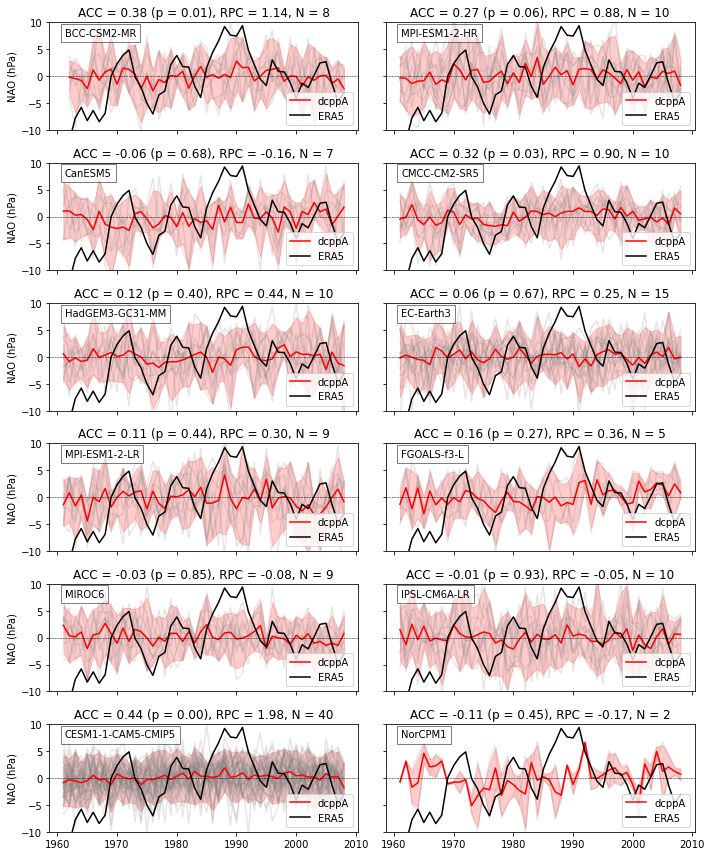

In [19]:
# Test the plotting function for individual models
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict_2_5,
                        models_list=psl_models,
                        short_period=True,
                        lag_and_var_adjust=False,
                        forecast_range='2-5')

Plotting the long period
Plotting the raw NAO index


Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the long period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index extracted for member 7
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the long period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index ext

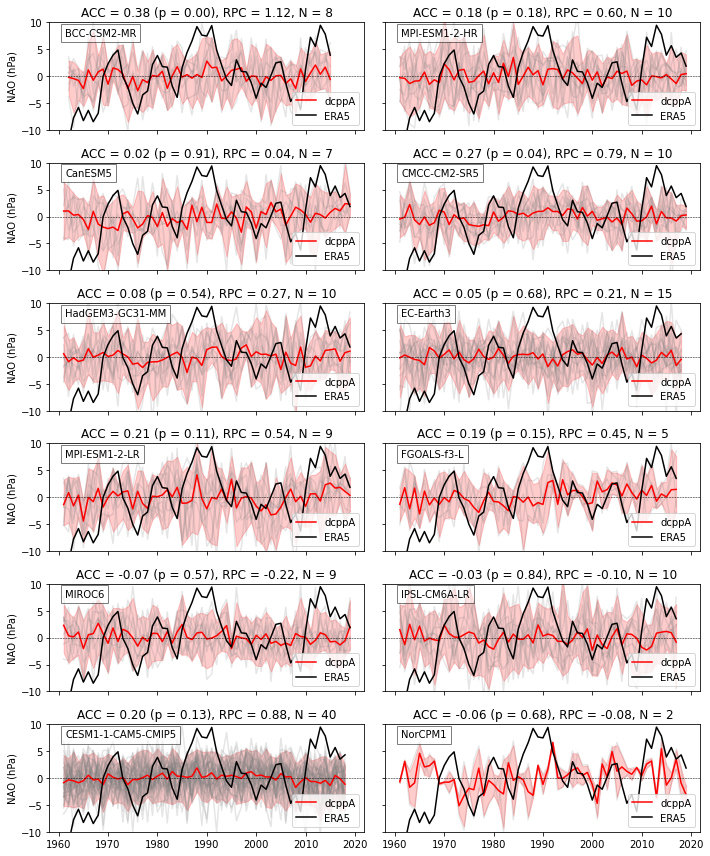

In [20]:
# And for the long period
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict_2_5,
                        models_list=psl_models,
                        short_period=False,
                        lag_and_var_adjust=False,
                        forecast_range='2-5')

Plotting the short period
Plotting the lag and variance adjusted NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the CanESM5 model
At index 2 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the CMCC-CM2-SR5 model
At index 3 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the HadGEM3-GC31-MM model
At index 4 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the EC-Earth3 model
At index 5 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-LR model
At index 6 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the FGOALS-f3-L model
At index 7 of the axes


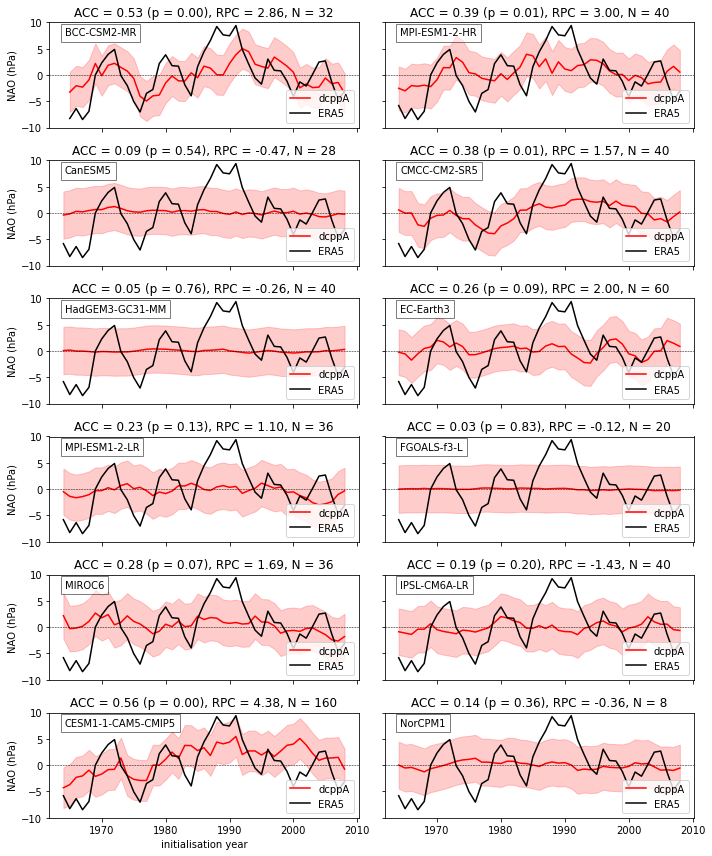

In [21]:
# Now for the short period, but with the lag and variance adjustment
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict_2_5,
                        models_list=psl_models,
                        short_period=True,
                        lag_and_var_adjust=True,
                        forecast_range='2-5')

Plotting the long period
Plotting the lag and variance adjusted NAO index


Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the CanESM5 model
At index 2 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the CMCC-CM2-SR5 model
At index 3 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the HadGEM3-GC31-MM model
At index 4 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the EC-Earth3 model
At index 5 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-LR model
At index 6 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the FGOALS-f3-L model
At index 7 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the 

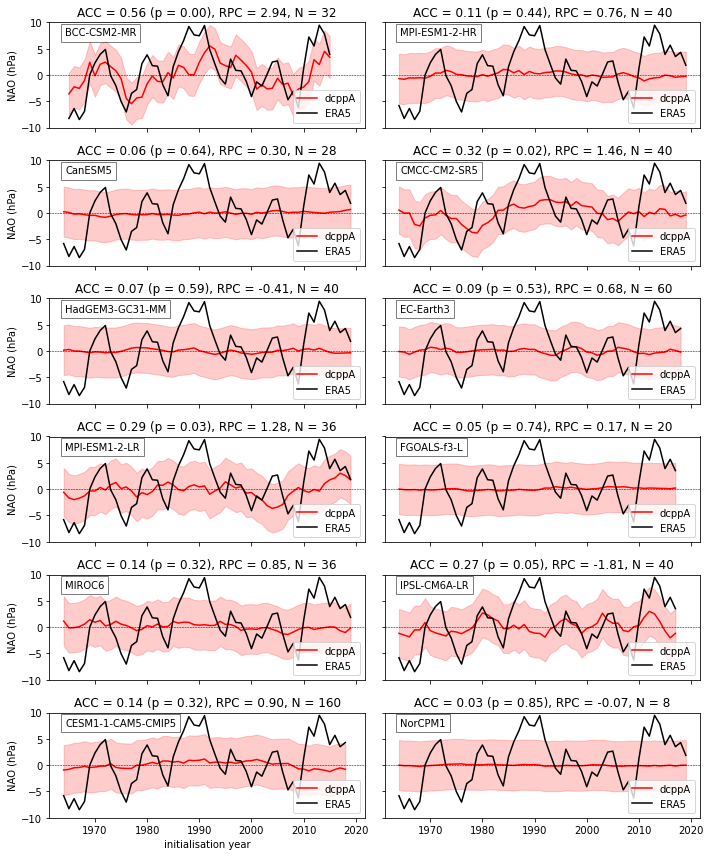

In [22]:
# Now for the long period, but with the lag and variance adjustment
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict_2_5,
                        models_list=psl_models,
                        short_period=False,
                        lag_and_var_adjust=True,
                        forecast_range='2-5')

In [25]:
#for the psl models list
# loop over
for model in dict.psl_models:
    print(model)

    # Extract the model data from the dictionary
    model_data_years = nao_stats_dict_2_5[model]['years']

    # print the min and max
    print("min:", np.min(model_data_years))
    print("max:", np.max(model_data_years))

BCC-CSM2-MR
min: 1964
max: 2017
MPI-ESM1-2-HR
min: 1963
max: 2021
CanESM5
min: 1963
max: 2021
CMCC-CM2-SR5
min: 1963
max: 2021
HadGEM3-GC31-MM
min: 1963
max: 2021
EC-Earth3
min: 1963
max: 2020
MPI-ESM1-2-LR
min: 1963
max: 2021
FGOALS-f3-L
min: 1963
max: 2019
MIROC6
min: 1963
max: 2021
IPSL-CM6A-LR
min: 1963
max: 2019
CESM1-1-CAM5-CMIP5
min: 1963
max: 2020
NorCPM1
min: 1963
max: 2021


In [42]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models, plot_multi_model_mean

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict

psl_models_noCan = dict.psl_models

# Import the functions again
importlib.reload(sys.modules['functions'])

# Import the functions again
import functions as func

Plotting the raw NAO index
Extracting ensemble members from the BCC-CSM2-MR model
Extracting members for the raw NAO index
Extracting member 0
NAO index extracted for member 0
NAO index extracted for short period for member 0
Extracting member 1
NAO index extracted for member 1
NAO index extracted for short period for member 1
Extracting member 2
NAO index extracted for member 2
NAO index extracted for short period for member 2
Extracting member 3
NAO index extracted for member 3
NAO index extracted for short period for member 3
Extracting member 4
NAO index extracted for member 4
NAO index extracted for short period for member 4
Extracting member 5
NAO index extracted for member 5
NAO index extracted for short period for member 5
Extracting member 6
NAO index extracted for member 6
NAO index extracted for short period for member 6
Extracting member 7
NAO index extracted for member 7
NAO index extracted for short period for member 7
Extracting ensemble members from the MPI-ESM1-2-HR mo

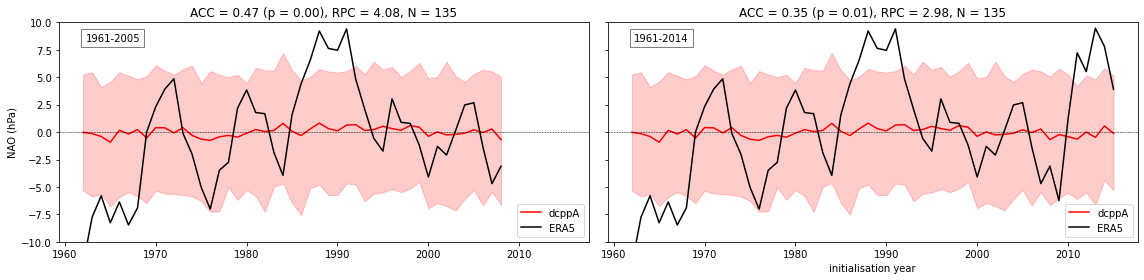

In [43]:
# Now plot the raw multi-model mean
plot_multi_model_mean(nao_stats_dict=nao_stats_dict_2_5,
                    models_list=psl_models,
                    lag_and_var_adjust=False,
                    forecast_range='2-5')

Plotting the lag and variance adjusted NAO index
Extracting ensemble members from the BCC-CSM2-MR model
Extracting members for the lag and variance adjusted NAO index
Extracting member 0
NAO index extracted for member 0
NAO index extracted for short period for member 0
Extracting member 1
NAO index extracted for member 1
NAO index extracted for short period for member 1
Extracting member 2
NAO index extracted for member 2
NAO index extracted for short period for member 2
Extracting member 3
NAO index extracted for member 3
NAO index extracted for short period for member 3
Extracting member 4
NAO index extracted for member 4
NAO index extracted for short period for member 4
Extracting member 5
NAO index extracted for member 5
NAO index extracted for short period for member 5
Extracting member 6
NAO index extracted for member 6
NAO index extracted for short period for member 6
Extracting member 7
NAO index extracted for member 7
NAO index extracted for short period for member 7
Extractin

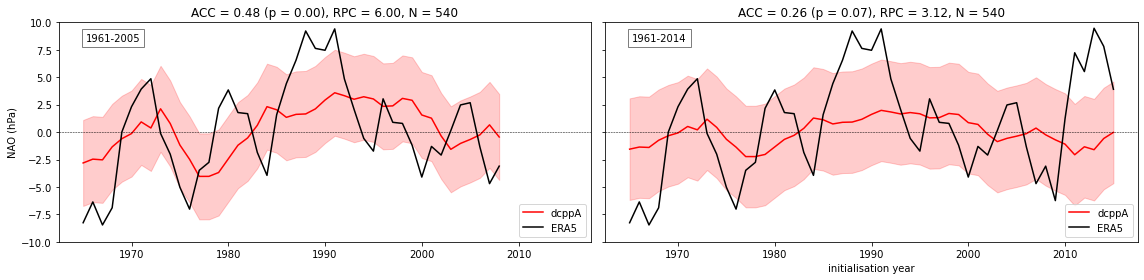

In [44]:
# Same but for the lagged and variance-adjusted multi-model mean
plot_multi_model_mean(nao_stats_dict=nao_stats_dict_2_5,
                    models_list=psl_models,
                    lag_and_var_adjust=True,
                    forecast_range='2-5')

In [45]:
# Now for years 2-3
obs_psl_anom_2_3 = func.read_obs(variable='psl',
                                region='global',
                                forecast_range='2-3',
                                season="DJFM",
                                observations_path=obs_path_psl,
                                start_year=1960,
                                end_year=2023)

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

In [46]:
# Load and process the years 2-3 model psl anomalies to be used for the NAO index
model_datasets_psl_2_3 = func.load_data(base_directory=base_dir,
                                        models=psl_models,
                                        variable=psl_var_name,
                                        region='global',
                                        forecast_range='2-3',
                                        season="DJFM")

# Process the model psl anomalies to be used for the NAO index
model_psl_anom_2_3, _ = func.process_data(datasets_by_model=model_datasets_psl_2_3,
                                        variable=psl_var_name)

Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/years_2-3/DJFM/outputs/mergetime/mergetime_CanESM5_psl_global_2-3_DJFM-r3i1.nc: [1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2020 2021]
Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/years_2-3/DJFM/outputs/mergetime/mergetime_CanESM5_psl_global_2-3_DJFM-r3i1.nc: [2017]-[2018]-[2020]
Member: /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/years_2-3/DJFM/outputs/mergetime/mergetime_CanESM5_psl_global_2-3_DJFM-r3i1.nc has non-consecutive years
Will not be included in the analysis
Counter: 1
Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/

In [47]:
# Remove years containing NaNs from the obs and model datasets
obs_psl_anom_2_3, \
model_data_psl_2_3, _ = func.remove_years_with_nans_nao(observed_data=obs_psl_anom_2_3,
                                                        model_data=model_psl_anom_2_3,
                                                        models=psl_models,
                                                        NAO_matched=False)

No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN v

In [52]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models, plot_multi_model_mean

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict

psl_models_noCan = dict.psl_models

# Import the functions again
importlib.reload(sys.modules['functions'])

# Import the functions again
import functions as func

In [50]:
# test the nao_stats dict function for years 2-3
nao_stats_dict_2_3 = nao_stats(obs_psl=obs_psl_anom_2_3,
                            hindcast_psl=model_data_psl_2_3,
                            models_list=psl_models,
                            lag=4,
                            short_period=(1965, 2010),
                            season="DJFM",
                            forecast_range='2-3')

Setting up the NAO stats for the BCC-CSM2-MR model
model number: 0
The years in the observations are not the same as the years in the hindcast data for the BCC-CSM2-MR model
Obs first year: 1962
Hindcast first year: 1963
Obs last year: 2020
Hindcast last year: 2016
years checking complete for the observations and the BCC-CSM2-MR model
years_short: [1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010]
nao_members shape: (8, 54)
nao_members_short shape: (8, 48)
nao_member shape: (54,)
nao_member_short shape: (48,)
nao_members shape: (8, 54)
nao_members_short shape: (8, 48)
nao_member shape: (54,)
nao_member_short shape: (48,)
nao_members shape: (8, 54)
nao_members_short shape: (8, 48)
nao_member shape: (54,)
nao_member_short shape: (48,)
nao_members shape: (8, 54)
nao_members_short shape: (8, 48)
nao

Plotting the short period
Plotting the raw NAO index


Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the short period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index extracted for member 7
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the short period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index e

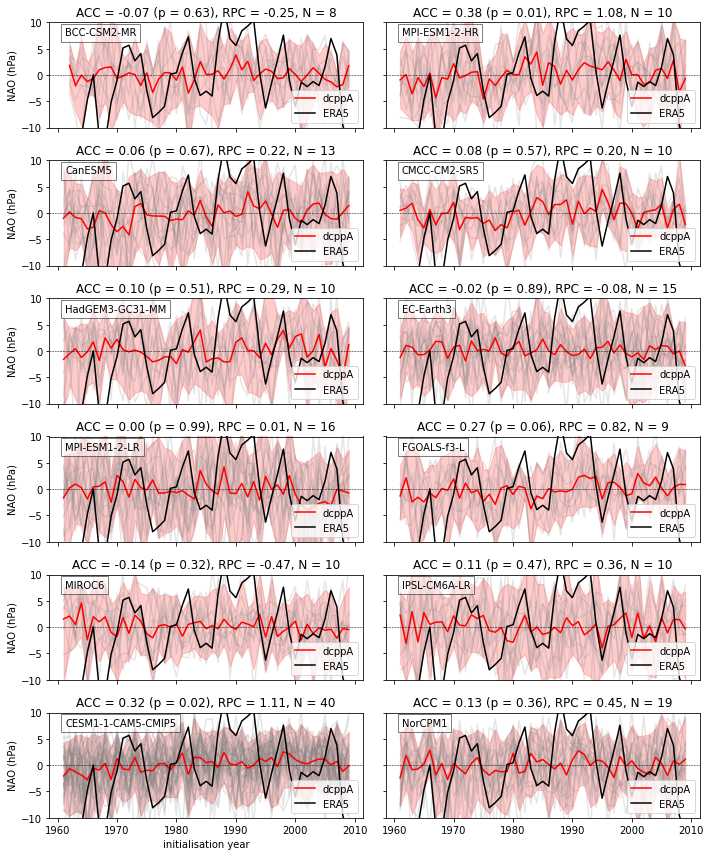

In [53]:
# Now ofr the individual models for the short period, raw
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict_2_3,
                        models_list=psl_models,
                        short_period=True,
                        lag_and_var_adjust=False,
                        forecast_range='2-3')

Plotting the long period
Plotting the raw NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the long period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index extracted for member 7
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the long period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index ex

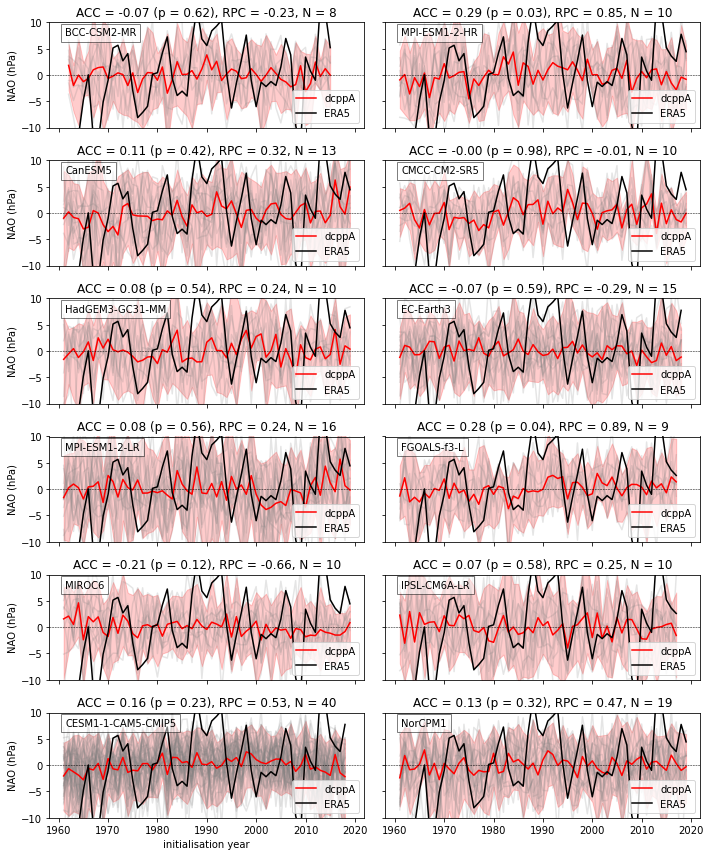

In [54]:
# Now for the long period, raw
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict_2_3,
                        models_list=psl_models,
                        short_period=False,
                        lag_and_var_adjust=False,
                        forecast_range='2-3')

Plotting the short period
Plotting the lag and variance adjusted NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the CanESM5 model
At index 2 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the CMCC-CM2-SR5 model
At index 3 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the HadGEM3-GC31-MM model
At index 4 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the EC-Earth3 model
At index 5 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-LR model
At index 6 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting the FGOALS-f3-L model
At index 7 of the axes


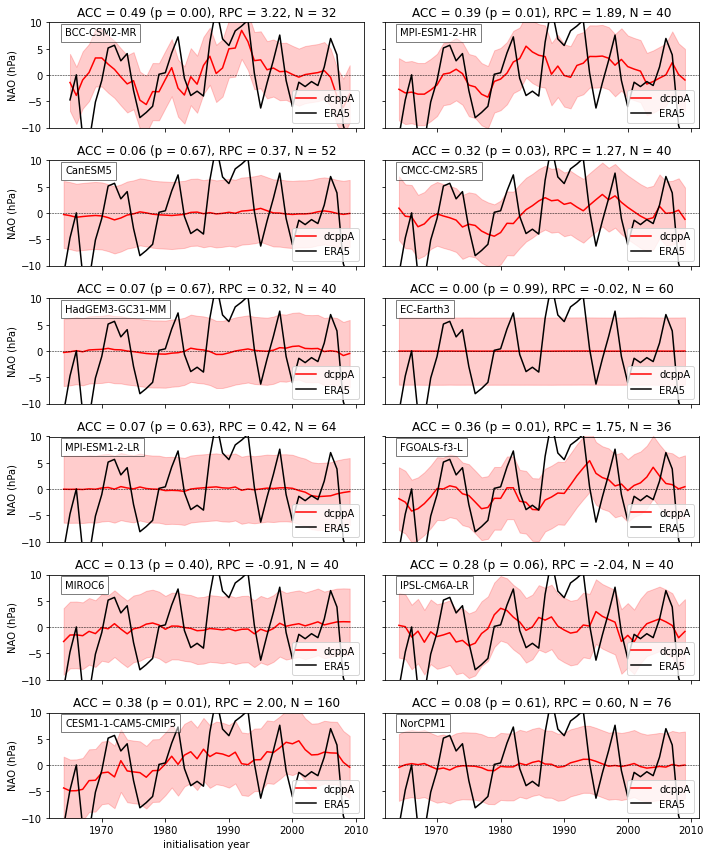

In [55]:
# Now for the short period, but with the lag and variance adjustment
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict_2_3,
                        models_list=psl_models,
                        short_period=True,
                        lag_and_var_adjust=True,
                        forecast_range='2-3')

Plotting the long period
Plotting the lag and variance adjusted NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the CanESM5 model
At index 2 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the CMCC-CM2-SR5 model
At index 3 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the HadGEM3-GC31-MM model
At index 4 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the EC-Earth3 model
At index 5 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the MPI-ESM1-2-LR model
At index 6 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting the FGOALS-f3-L model
At index 7 of the axes
Plotting

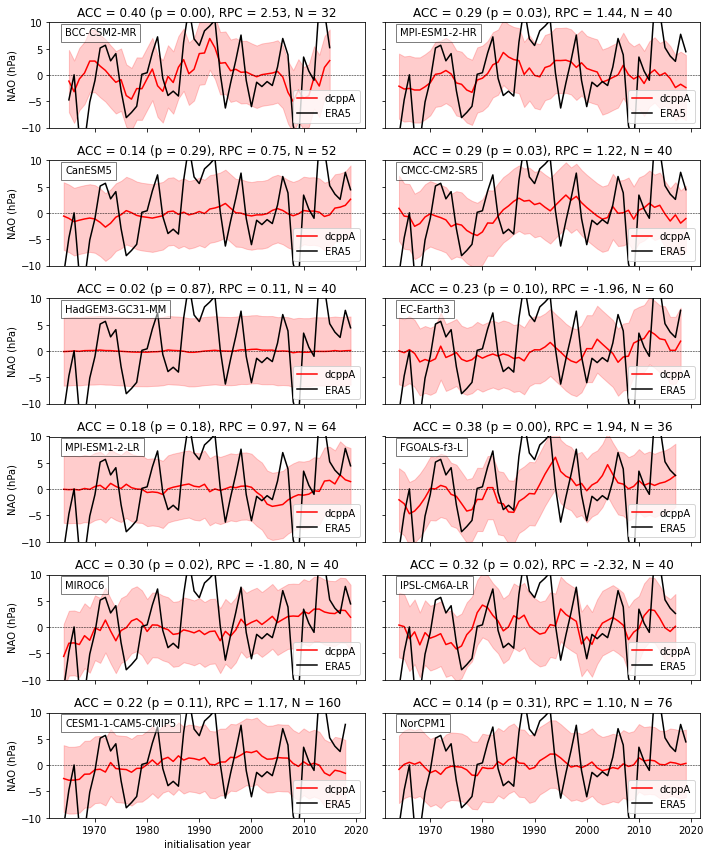

In [56]:
# Now for the long period, but with the lag and variance adjustment
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict_2_3,
                        models_list=psl_models,
                        short_period=False,
                        lag_and_var_adjust=True,
                        forecast_range='2-3')

In [60]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models, plot_multi_model_mean

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict

psl_models_noCan = dict.psl_models

# Import the functions again
importlib.reload(sys.modules['functions'])

# Import the functions again
import functions as func

Plotting the raw NAO index
Extracting ensemble members from the BCC-CSM2-MR model
Extracting members for the raw NAO index
Extracting member 0
NAO index extracted for member 0
NAO index extracted for short period for member 0
Extracting member 1
NAO index extracted for member 1
NAO index extracted for short period for member 1
Extracting member 2
NAO index extracted for member 2
NAO index extracted for short period for member 2
Extracting member 3
NAO index extracted for member 3
NAO index extracted for short period for member 3
Extracting member 4
NAO index extracted for member 4
NAO index extracted for short period for member 4
Extracting member 5
NAO index extracted for member 5
NAO index extracted for short period for member 5
Extracting member 6
NAO index extracted for member 6
NAO index extracted for short period for member 6
Extracting member 7
NAO index extracted for member 7
NAO index extracted for short period for member 7
Extracting ensemble members from the MPI-ESM1-2-HR mo

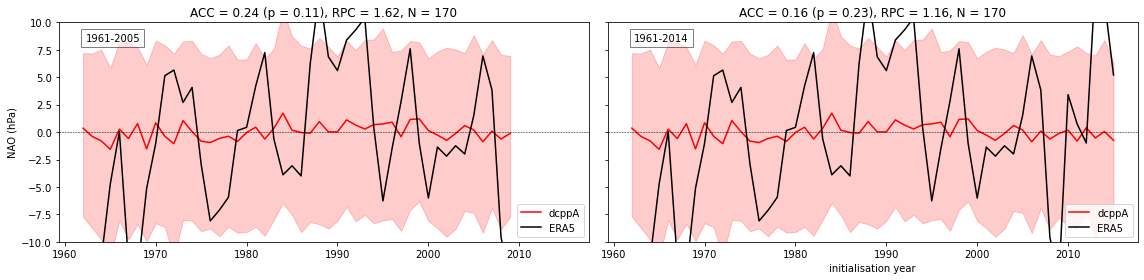

In [61]:
# Now plot the raw multi-model mean
plot_multi_model_mean(nao_stats_dict=nao_stats_dict_2_3,
                    models_list=psl_models,
                    lag_and_var_adjust=False,
                    forecast_range='2-3')

Plotting the lag and variance adjusted NAO index
Extracting ensemble members from the BCC-CSM2-MR model
Extracting members for the lag and variance adjusted NAO index
Extracting member 0
NAO index extracted for member 0
NAO index extracted for short period for member 0
Extracting member 1
NAO index extracted for member 1
NAO index extracted for short period for member 1
Extracting member 2
NAO index extracted for member 2
NAO index extracted for short period for member 2
Extracting member 3
NAO index extracted for member 3
NAO index extracted for short period for member 3
Extracting member 4
NAO index extracted for member 4
NAO index extracted for short period for member 4
Extracting member 5
NAO index extracted for member 5
NAO index extracted for short period for member 5
Extracting member 6
NAO index extracted for member 6
NAO index extracted for short period for member 6
Extracting member 7
NAO index extracted for member 7
NAO index extracted for short period for member 7
Extractin

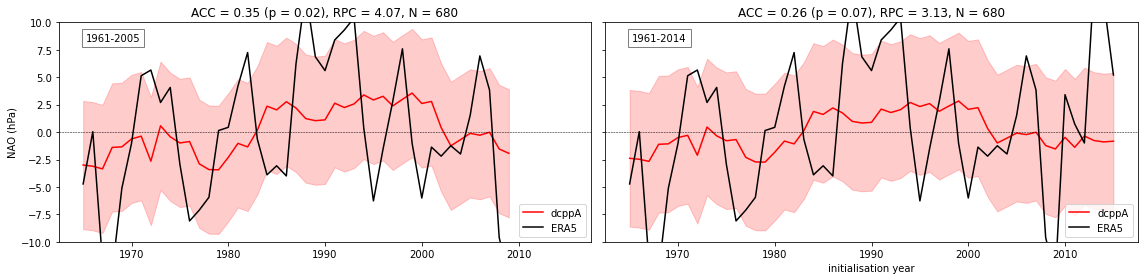

In [62]:
# Same but for the lagged and variance-adjusted multi-model mean
plot_multi_model_mean(nao_stats_dict=nao_stats_dict_2_3,
                    models_list=psl_models,
                    lag_and_var_adjust=True,
                    forecast_range='2-3')

In [4]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models, plot_multi_model_mean

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict

psl_models_noCan = dict.psl_models

# Import the functions again
importlib.reload(sys.modules['functions'])

# Import the functions again
import functions as func

In [5]:
# Now process years 2-2
obs_psl_anom_2_2 = func.read_obs(variable='psl',
                                region='global',
                                forecast_range='2-2',
                                season="DJFM",
                                observations_path=obs_path_psl,
                                start_year=1960,
                                end_year=2023)

Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [6]:
# Load and process the years 2-2 model psl anomalies to be used for the NAO index
model_datasets_psl_2_2 = func.load_data(base_directory=base_dir,
                                        models=psl_models,
                                        variable=psl_var_name,
                                        region='global',
                                        forecast_range='2-2',
                                        season="DJFM")

# Process the model psl anomalies to be used for the NAO index
model_psl_anom_2_2, _ = func.process_data(datasets_by_model=model_datasets_psl_2_2,
                                        variable=psl_var_name)

Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/years_2-2/DJFM/outputs/mergetime/mergetime_CanESM5_psl_global_2-2_DJFM-r1i1.nc: [1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2020 2021]
Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/years_2-2/DJFM/outputs/mergetime/mergetime_CanESM5_psl_global_2-2_DJFM-r1i1.nc: [2017]-[2018]-[2020]
Member: /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/years_2-2/DJFM/outputs/mergetime/mergetime_CanESM5_psl_global_2-2_DJFM-r1i1.nc has non-consecutive years
Will not be included in the analysis
Counter: 1
Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/psl/CanESM5/global/

In [7]:
# Remove years containing NaNs from the obs and model datasets
obs_psl_anom_2_2, \
model_data_psl_2_2, _ = func.remove_years_with_nans_nao(observed_data=obs_psl_anom_2_2,
                                                        model_data=model_psl_anom_2_2,
                                                        models=psl_models,
                                                        NAO_matched=False)

No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN v

In [4]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models, plot_multi_model_mean

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict

psl_models_noCan = dict.psl_models

# Import the functions again
importlib.reload(sys.modules['functions'])

# Import the functions again
import functions as func

In [10]:
# Test the nao_stats dict function for years 2-2
# TODO: Fix the year 2-2 data for DJFM so that it is the same range as the other years
nao_stats_dict_2_2 = nao_stats(obs_psl=obs_psl_anom_2_2,
                            hindcast_psl=model_data_psl_2_2,
                            models_list=psl_models,
                            lag=4,
                            short_period=(1965, 2010),
                            season="DJFM",
                            forecast_range='2-2')

Setting up the NAO stats for the BCC-CSM2-MR model
model number: 0


The years in the observations are not the same as the years in the hindcast data for the BCC-CSM2-MR model
Obs first year: 1962
Hindcast first year: 1963
Obs last year: 2000
Hindcast last year: 2000
years checking complete for the observations and the BCC-CSM2-MR model
years_short: [1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010]


IndexError: Index 38 is out of bounds for axis 0 with size 38

In [5]:
# Process the global psl anomalies to be used for the NAO index
# for years 2-5
obs_tas_anom = func.read_obs(variable='tas',
                            region='global',
                            forecast_range='2-9',
                            season="DJFM",
                            observations_path=obs_path_psl,
                            start_year=1960,
                            end_year=2023)

Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [6]:
# Process the global psl anomalies to be used for the NAO index
# for years 2-5
obs_psl_anom = func.read_obs(variable='psl',
                            region='global',
                            forecast_range='2-9',
                            season="DJFM",
                            observations_path=obs_path_psl,
                            start_year=1960,
                            end_year=2023)

Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [7]:
obs_tas_anom

<xarray.DataArray 'filled-5fcfb041ef3bd3c2468018326cf83f93' (time: 64, lat: 72,
                                                             lon: 144)>
dask.array<truediv, shape=(64, 72, 144), dtype=float64, chunksize=(8, 72, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2023-12-31
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5

In [8]:
# Load and process the model psl anomalies to be used for the NAO index
model_datasets_tas = func.load_data(base_directory=base_dir,
                                    models=dict.tas_models,
                                    variable='tas',
                                    region='global',
                                    forecast_range='2-9',
                                    season="DJFM")

# Process the model psl anomalies to be used for the NAO index
model_tas_anom, _ = func.process_data(datasets_by_model=model_datasets_tas,
                                    variable='tas')

Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/tas/FGOALS-f3-L/global/years_2-9/DJFM/outputs/mergetime/mergetime_FGOALS-f3-L_tas_global_2-9_DJFM-r3i1.nc: [1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/tas/FGOALS-f3-L/global/years_2-9/DJFM/outputs/mergetime/mergetime_FGOALS-f3-L_tas_global_2-9_DJFM-r3i1.nc: [1981]-[1982]-[1984]
Member: /home/users/benhutch/skill-maps-processed-data/tas/FGOALS-f3-L/global/years_2-9/DJFM/outputs/mergetime/mergetime_FGOALS-f3-L_tas_global_2-9_DJFM-r3i1.nc has non-consecutive years
Will not be included in the analysis
Counter: 1
Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/tas/FGOALS-f3-L/globa

In [9]:
# Load and process the model psl anomalies to be used for the NAO index
model_datasets_psl = func.load_data(base_directory=base_dir,
                                    models=psl_models,
                                    variable='psl',
                                    region='global',
                                    forecast_range='2-9',
                                    season="DJFM")

# Process the model psl anomalies to be used for the NAO index
model_psl_anom, _ = func.process_data(datasets_by_model=model_datasets_psl,
                                    variable='psl')

In [10]:
# Remove years containing NaNs from the obs and model datasets
obs_tas_anom, \
model_data_tas, _ = func.remove_years_with_nans_nao(observed_data=obs_tas_anom,
                                                    model_data=model_tas_anom,
                                                    models=dict.tas_models,
                                                    NAO_matched=False)

No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN v

In [11]:
# Remove years containing NaNs from the obs and model datasets
obs_psl_anom, \
model_data_psl, _ = func.remove_years_with_nans_nao(observed_data=obs_psl_anom,
                                                    model_data=model_psl_anom,
                                                    models=psl_models,
                                                    NAO_matched=False)

No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN v

In [12]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models, plot_multi_model_mean

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict

psl_models_noCan = dict.psl_models

# Import the functions again
importlib.reload(sys.modules['functions'])

# Import the functions again
import functions as func

In [13]:
# # Set up a test list of models
# test_model = ["BCC-CSM2-MR"]

In [14]:
# Run the NAO stats function
nao_stats_dict_tas = nao_stats(obs_psl=obs_psl_anom,
                                hindcast_psl=model_psl_anom,
                                models_list=dict.tas_models,
                                obs_tas=obs_tas_anom,
                                hindcast_tas=model_data_tas,
                                lag=4,
                                short_period=(1965, 2010),
                                season="DJFM")

Setting up the NAO stats for the BCC-CSM2-MR model
model number: 0
checking that the length of hindcast_psl and hindcast_tas are the same
checking that the years for BCC-CSM2-MR are 1966 to 2019
checking that the length of hindcast_psl and hindcast_tas are the same for the rest of the members
checking that the years for BCC-CSM2-MR are 1966 to 2019
checking that the length of hindcast_psl and hindcast_tas are the same for the rest of the members
checking that the years for BCC-CSM2-MR are 1966 to 2019
checking that the length of hindcast_psl and hindcast_tas are the same for the rest of the members
checking that the years for BCC-CSM2-MR are 1966 to 2019
checking that the length of hindcast_psl and hindcast_tas are the same for the rest of the members
checking that the years for BCC-CSM2-MR are 1966 to 2019
checking that the length of hindcast_psl and hindcast_tas are the same for the rest of the members
checking that the years for BCC-CSM2-MR are 1966 to 2019
checking that the length 

comparing tas data to psl data and obs data
years1_tas first year: 1966
years1 first year: 1966
years1_tas last year: 2019
years1 last year: 2019
The years in the observations are not the same as the years in the hindcast data for the BCC-CSM2-MR model
Obs first year: 1965
Hindcast first year: 1966
Obs last year: 2019
Hindcast last year: 2019
The years in the observations are not the same as the years in the hindcast data for the BCC-CSM2-MR model
Obs first year: 1965
Hindcast first year: 1966
Obs last year: 2019
Hindcast last year: 2019
years checking complete for the observations and the BCC-CSM2-MR model
years_short: [1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010]
nao_members shape: (8, 54)
nao_members_short shape: (8, 45)
nao_member shape: (54,)
nao_member_short shape: (45,)
nao_members shape: (8, 54)
n

In [15]:
print(nao_stats_dict_tas['CESM1-1-CAM5-CMIP5'])

{'years': array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]), 'years_lag': array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]), 'years_lag_short': array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003

In [16]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models, \
                                plot_multi_model_mean, plot_subplots_ind_models_spna, \
                                plot_multi_model_mean_spna

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict

psl_models_noCan = dict.psl_models

# Import the functions again
importlib.reload(sys.modules['functions'])

# Import the functions again
import functions as func

Plotting the short period
Plotting the raw NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the short period and the raw NAO index
Plotting the short period and the raw SPNA index
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the short period and the raw NAO index
Plotting the short period and the raw SPNA index
Plotting the CanESM5 model
At index 2 of the axes
Plotting the short period and the raw NAO index
Plotting the short period and the raw SPNA index
Plotting the CMCC-CM2-SR5 model
At index 3 of the axes
Plotting the short period and the raw NAO index
Plotting the short period and the raw SPNA index
Plotting the HadGEM3-GC31-MM model
At index 4 of the axes
Plotting the short period and the raw NAO index
Plotting the short period and the raw SPNA index
Plotting the EC-Earth3 model
At index 5 of the axes
Plotting the short period and the raw NAO index
Plotting the short period and the raw SPNA index
Plotting the FGOALS-f3-L model
At index 

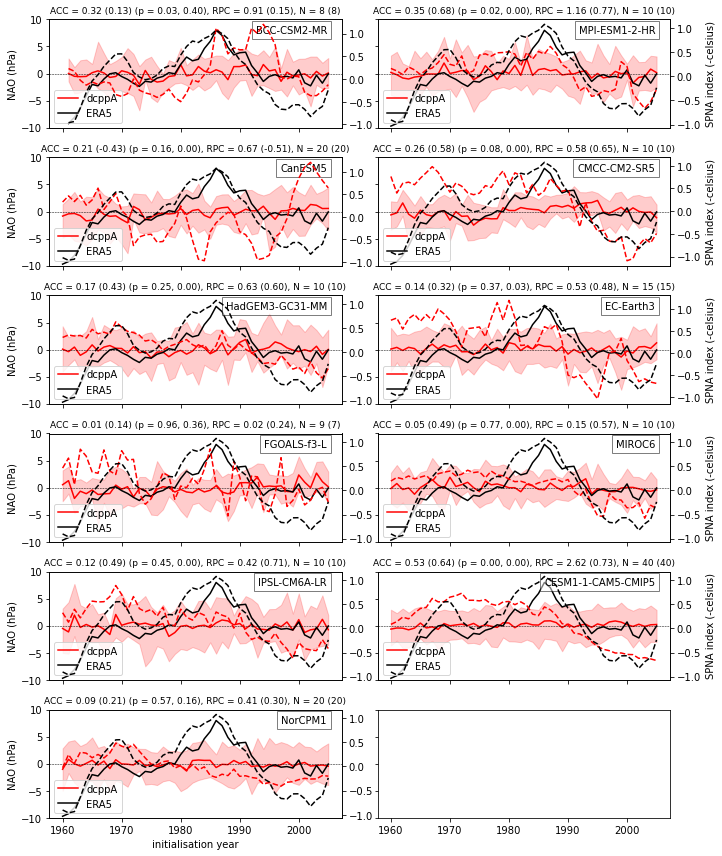

In [17]:
# Test the new plotting function, short period, no lag and variance adjustment
plot_subplots_ind_models_spna(nao_stats_dict=nao_stats_dict_tas,
                            models_list=dict.tas_models,
                            short_period=True,
                            lag_and_var_adjust=False)

Plotting the long period
Plotting the raw NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the long period and the raw NAO index
Plotting the long period and the raw SPNA index
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the long period and the raw NAO index
Plotting the long period and the raw SPNA index
Plotting the CanESM5 model
At index 2 of the axes
Plotting the long period and the raw NAO index
Plotting the long period and the raw SPNA index
Plotting the CMCC-CM2-SR5 model
At index 3 of the axes
Plotting the long period and the raw NAO index
Plotting the long period and the raw SPNA index
Plotting the HadGEM3-GC31-MM model
At index 4 of the axes
Plotting the long period and the raw NAO index
Plotting the long period and the raw SPNA index
Plotting the EC-Earth3 model
At index 5 of the axes
Plotting the long period and the raw NAO index
Plotting the long period and the raw SPNA index
Plotting the FGOALS-f3-L model
At index 6 of the axes

Plotting the MIROC6 model
At index 7 of the axes
Plotting the long period and the raw NAO index
Plotting the long period and the raw SPNA index
Plotting the IPSL-CM6A-LR model
At index 8 of the axes
Plotting the long period and the raw NAO index
Plotting the long period and the raw SPNA index
Plotting the CESM1-1-CAM5-CMIP5 model
At index 9 of the axes
Plotting the long period and the raw NAO index
Plotting the long period and the raw SPNA index
Plotting the NorCPM1 model
At index 10 of the axes
Plotting the long period and the raw NAO index
Plotting the long period and the raw SPNA index


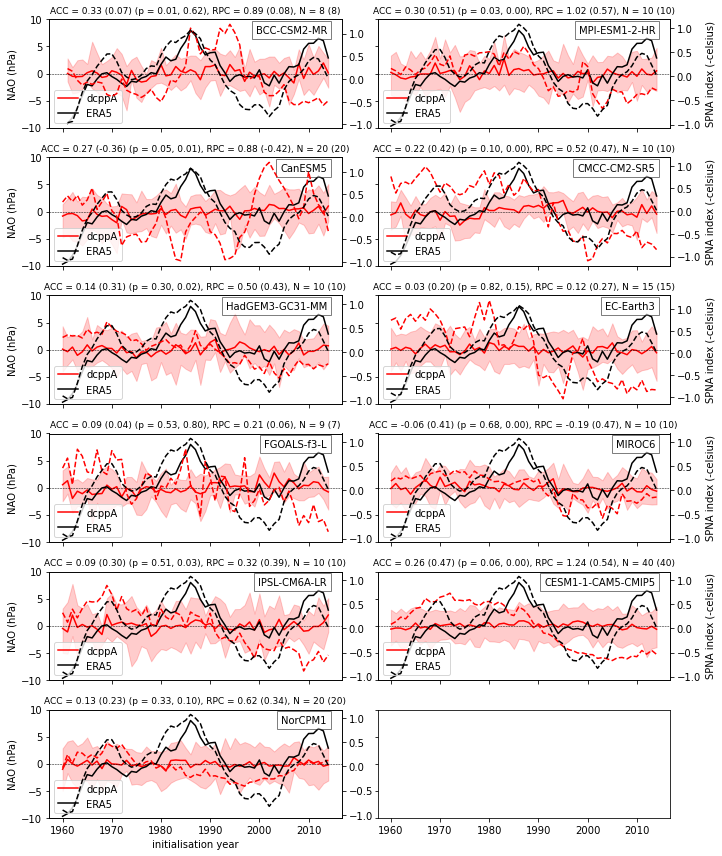

In [18]:
# test the new plotting function, long period, no lag and variance adjustment
plot_subplots_ind_models_spna(nao_stats_dict=nao_stats_dict_tas,
                            models_list=dict.tas_models,
                            short_period=False,
                            lag_and_var_adjust=False)

Plotting the raw NAO index
Extracting ensemble members from the BCC-CSM2-MR model
Extracting members for the raw NAO index
Extracting member 0
NAO index extracted for member 0
NAO index extracted for short period for member 0
Extracting member 1
NAO index extracted for member 1
NAO index extracted for short period for member 1
Extracting member 2
NAO index extracted for member 2
NAO index extracted for short period for member 2
Extracting member 3
NAO index extracted for member 3
NAO index extracted for short period for member 3
Extracting member 4
NAO index extracted for member 4
NAO index extracted for short period for member 4
Extracting member 5
NAO index extracted for member 5
NAO index extracted for short period for member 5
Extracting member 6
NAO index extracted for member 6
NAO index extracted for short period for member 6
Extracting member 7
NAO index extracted for member 7
NAO index extracted for short period for member 7
Extracting tas member 0
SPNA index extracted for memb

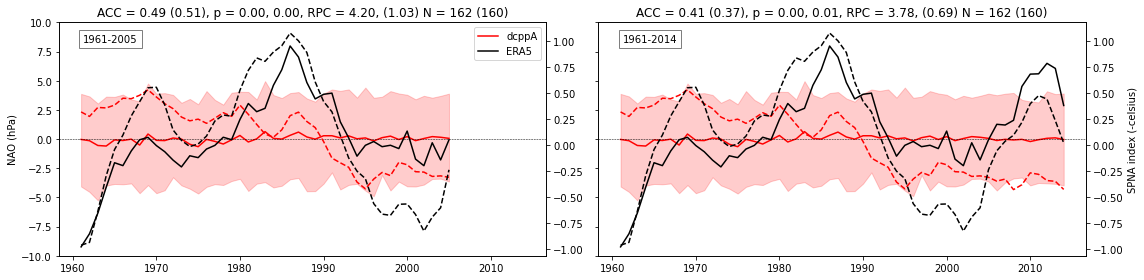

In [19]:
# test the new SPNA multi-model mean plotting function, no lag and variance adjustment
plot_multi_model_mean_spna(nao_stats_dict=nao_stats_dict_tas,
                           models_list=dict.tas_models,
                           lag_and_var_adjust=False)

Plotting the lag and variance adjusted NAO index
Extracting ensemble members from the BCC-CSM2-MR model
Extracting members for the lag and variance adjusted NAO index
Extracting member 0
NAO index extracted for member 0
NAO index extracted for short period for member 0
Extracting member 1
NAO index extracted for member 1
NAO index extracted for short period for member 1
Extracting member 2
NAO index extracted for member 2
NAO index extracted for short period for member 2
Extracting member 3
NAO index extracted for member 3
NAO index extracted for short period for member 3
Extracting member 4
NAO index extracted for member 4
NAO index extracted for short period for member 4
Extracting member 5
NAO index extracted for member 5
NAO index extracted for short period for member 5
Extracting member 6
NAO index extracted for member 6
NAO index extracted for short period for member 6
Extracting member 7
NAO index extracted for member 7
NAO index extracted for short period for member 7
Extractin

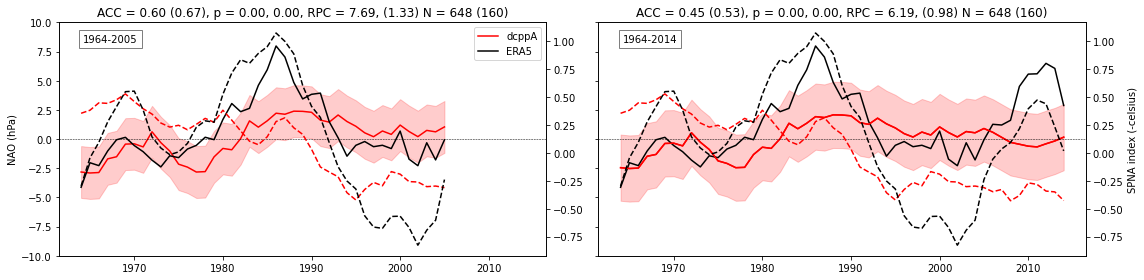

In [20]:
# test the new SPNA multi-model mean plotting function, with lag and variance adjustment
plot_multi_model_mean_spna(nao_stats_dict=nao_stats_dict_tas,
                           models_list=dict.tas_models,
                           lag_and_var_adjust=True)

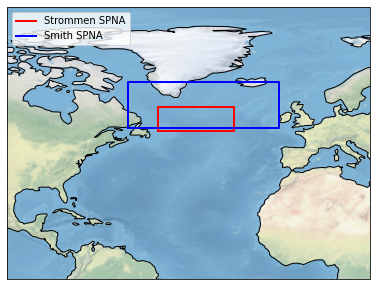

In [26]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

# Set up the projection
projection = ccrs.PlateCarree(central_longitude=0)

# Plot the differences between the two gridboxes
# Set up the figure
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# # Include the stock image and coastlines
ax.stock_img()
ax.coastlines()

# Extract the lat and lon data for the strommen box
lon1_strommen, lon2_strommen = dict.spna_grid_strommen['lon1'], dict.spna_grid_strommen['lon2']
lat1_strommen, lat2_strommen = dict.spna_grid_strommen['lat1'], dict.spna_grid_strommen['lat2']

# Extract the lat and lon data for the smith box
lon1_smith, lon2_smith = dict.spna_grid_smith['lon1'], dict.spna_grid_smith['lon2']
lat1_smith, lat2_smith = dict.spna_grid_smith['lat1'], dict.spna_grid_smith['lat2']

# Plot these boxes
ax.plot([lon1_strommen, lon2_strommen, lon2_strommen, lon1_strommen, lon1_strommen],
        [lat1_strommen, lat1_strommen, lat2_strommen, lat2_strommen, lat1_strommen],
        color='red', linewidth=2, transform=projection, label="Strommen SPNA")

ax.plot([lon1_smith, lon2_smith, lon2_smith, lon1_smith, lon1_smith],
        [lat1_smith, lat1_smith, lat2_smith, lat2_smith, lat1_smith],
        color='blue', linewidth=2, transform=projection, label="Smith SPNA")

# Zoom in on the region
ax.set_extent([-100, 20, 0, 90], crs=projection)

# Create a legend
ax.legend(loc = 'upper left')

# show the plot
plt.show()

In [1]:
import matplotlib.pyplot as plt

# Create a scatter plot of the NAO index against the SPNA index
# with the SPNA index on the x-axis
# and the NAO index on the y-axis
# Where 1 point is 1 year of data for one model
# test this for a specific model first
test_model = "CESM1-1-CAM5-CMIP5"

# Extract the SPNA index for the test model
spna_index_model_short = nao_stats_dict_tas[test_model]['model_spna_members_short']
spna_index_model_long = nao_stats_dict_tas[test_model]['model_spna_members']

# Extract the NAO index for the test model
nao_index_model_short = nao_stats_dict_tas[test_model]['model_nao_ts_members_short']
nao_index_model_long = nao_stats_dict_tas[test_model]['model_nao_ts_members']

# Extract the SPNA index for the observations
spna_index_obs_short = nao_stats_dict_tas['BCC-CSM2-MR']['obs_spna_short']
spna_index_obs_long = nao_stats_dict_tas['BCC-CSM2-MR']['obs_spna']

# Extract the NAO index for the observations
nao_index_obs_short = nao_stats_dict_tas['BCC-CSM2-MR']['obs_nao_ts_short']
nao_index_obs_long = nao_stats_dict_tas['BCC-CSM2-MR']['obs_nao_ts']

# find the index of years 2010-2019 in the long period years
# for the test model
long_period_years = nao_stats_dict_tas[test_model]['years']

# find the index of years 2010-2019 in the long period years
# for the test model
bust_index_start = np.where(long_period_years == 2010)[0][0]

# find the index of years 2010-2019 in the long period years
# for the test model
bust_index_end = np.where(long_period_years == 2019)[0][0]

# Print the start and end indices
print("Long period start year:", long_period_years[bust_index_start])
print("Long period end year:", long_period_years[bust_index_end])

# Extract the bust period for the model
spna_index_model_bust = spna_index_model_long[:, bust_index_start:bust_index_end+1]

# Extract the bust period for the model
nao_index_model_bust = nao_index_model_long[:, bust_index_start:bust_index_end+1]

# Extract the bust period for the obs
spna_index_obs_bust = spna_index_obs_long[bust_index_start:bust_index_end+1]

# Extract the bust period for the obs
nao_index_obs_bust = nao_index_obs_long[bust_index_start:bust_index_end+1]

# # Normalize the model NAO index by dividing by standard deviation
# nao_index_model_short = nao_index_model_short * np.std(nao_index_model_short)

# # Normalize the model NAO index by dividing by standard deviation
# nao_index_model_long = nao_index_model_long * np.std(nao_index_model_long)

# Set up the figure
# two subplots, one for the short period, one for the long period
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Plot the scatter plot for the short period
# Set up the axes
ax1 = axs[0] ; ax2 = axs[1]

# include gridlines
ax1.grid() ; ax2.grid()

# Plot the scatter plot for the short period
# Both for the model and observations
# With shape (45,) and (45,) respectively
ax1.scatter(spna_index_model_short, nao_index_model_short / 100, label="model", color="red")

# Plot the scatter plot for the short period
# for the observations
ax1.scatter(spna_index_obs_short, nao_index_obs_short / 100, label="obs", color="black")


# set up the y-axis lable
ax1.set_ylabel("NAO (hPa)")

# set up the x-axis label
ax1.set_xlabel("SPNA (celsius)")

# # Constrain the x-axis and y-axis limits
# ax1.set_xlim(-1, 1) ; ax1.set_ylim(-10, 10)

# Include a legend
ax1.legend(loc = "upper right")

# Set up a text box for the short period in the top left corner
ax1.text(0.05, 0.05, "s1966-s2005", transform=ax1.transAxes, ha = "left",
            va='bottom')

# Plot the scatter plot for the bust period
# from 2010-2019
ax2.scatter(spna_index_model_bust, nao_index_model_bust / 100, label="model", color="red")

# Plot the scatter plot for the bust period
# from 2010-2019
ax2.scatter(spna_index_obs_bust, nao_index_obs_bust / 100, label="obs", color="black")

# # set up the y-axis lable
# ax2.set_ylabel("NAO (hPa)")

# # constrain the x-axis and y-axis limits
# ax2.set_xlim(-1, 1) ; ax2.set_ylim(-10, 10)

# set up the x-axis label
ax2.set_xlabel("SPNA (celsius)")

# Include a legend
ax2.text(0.05, 0.05, "s2005-s2014", transform=ax2.transAxes, ha = "left",
            va='bottom')

# Adjust the spacing between the subplots
fig.tight_layout()

NameError: name 'nao_stats_dict_tas' is not defined

Long period start year: 2010
Long period end year: 2019


ValueError: x and y must be the same size

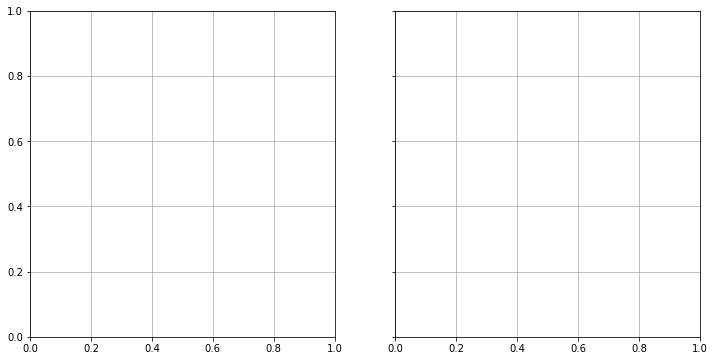

In [25]:
# Do the same, but for the lagged and variance-adjusted NAO index
# Create a scatter plot of the NAO index against the SPNA index
# with the SPNA index on the x-axis
# and the NAO index on the y-axis
# Where 1 point is 1 year of data for one model
# test this for a specific model first
test_model = "CESM1-1-CAM5-CMIP5"

# TODO: extract members instead

# Extract the SPNA index for the test model
spna_index_model_short = nao_stats_dict_tas[test_model]['model_spna_members_short'][:, 3:]
spna_index_model_long = nao_stats_dict_tas[test_model]['model_spna_members'][:, 3:]

# Extract the NAO index for the test model
nao_index_model_short = nao_stats_dict_tas[test_model]['model_nao_ts_lag_members_short'][:, 3:]
nao_index_model_long = nao_stats_dict_tas[test_model]['model_nao_ts_lag_members'][:, 3:]

# Extract the SPNA index for the observations
spna_index_obs_short = nao_stats_dict_tas[test_model]['obs_spna_short'][3:]
spna_index_obs_long = nao_stats_dict_tas[test_model]['obs_spna'][3:]

# Extract the NAO index for the observations
nao_index_obs_short = nao_stats_dict_tas[test_model]['obs_nao_ts_lag_short']
nao_index_obs_long = nao_stats_dict_tas[test_model]['obs_nao_ts_lag']

# find the index of years 2010-2019 in the long period years
# for the test model
long_period_years = nao_stats_dict_tas[test_model]['years_lag']

# find the index of years 2010-2019 in the long period years
# for the test model
bust_index_start = np.where(long_period_years == 2010)[0][0]

# find the index of years 2010-2019 in the long period years
# for the test model
bust_index_end = np.where(long_period_years == 2019)[0][0]

# Print the start and end indices
print("Long period start year:", long_period_years[bust_index_start])
print("Long period end year:", long_period_years[bust_index_end])

# Extract the bust period for the model
spna_index_model_bust = spna_index_model_long[bust_index_start:bust_index_end+1]

# Extract the bust period for the model
nao_index_model_bust = nao_index_model_long[bust_index_start:bust_index_end+1]

# Extract the bust period for the obs
spna_index_obs_bust = spna_index_obs_long[bust_index_start:bust_index_end+1]

# Extract the bust period for the obs
nao_index_obs_bust = nao_index_obs_long[bust_index_start:bust_index_end+1]

# # Normalize the model NAO index by dividing by standard deviation
# nao_index_model_short = nao_index_model_short * np.std(nao_index_model_short)

# # Normalize the model NAO index by dividing by standard deviation
# nao_index_model_long = nao_index_model_long * np.std(nao_index_model_long)

# Set up the figure
# two subplots, one for the short period, one for the long period
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Plot the scatter plot for the short period
# Set up the axes
ax1 = axs[0] ; ax2 = axs[1]

# include gridlines
ax1.grid() ; ax2.grid()

# Plot the scatter plot for the short period
# Both for the model and observations
# With shape (45,) and (45,) respectively
ax1.scatter(spna_index_model_short, nao_index_model_short / 100, label="model", color="red")

# Plot the scatter plot for the short period
# for the observations
ax1.scatter(spna_index_obs_short, nao_index_obs_short / 100, label="obs", color="black")


# set up the y-axis lable
ax1.set_ylabel("NAO (hPa)")

# set up the x-axis label
ax1.set_xlabel("SPNA (celsius)")

# # Constrain the x-axis and y-axis limits
# ax1.set_xlim(-1, 1) ; ax1.set_ylim(-10, 10)

# Include a legend
ax1.legend(loc = "upper right")

# Set up a text box for the short period in the top left corner
ax1.text(0.05, 0.05, "s1966-s2005", transform=ax1.transAxes, ha = "left",
            va='bottom')

# Plot the scatter plot for the bust period
# from 2010-2019
ax2.scatter(spna_index_model_bust, nao_index_model_bust / 100, label="model", color="red")

# Plot the scatter plot for the bust period
# from 2010-2019
ax2.scatter(spna_index_obs_bust, nao_index_obs_bust / 100, label="obs", color="black")

# # set up the y-axis lable
# ax2.set_ylabel("NAO (hPa)")

# # constrain the x-axis and y-axis limits
# ax2.set_xlim(-1, 1) ; ax2.set_ylim(-10, 10)

# set up the x-axis label
ax2.set_xlabel("SPNA (celsius)")

# Include a legend
ax2.text(0.05, 0.05, "s2005-s2014", transform=ax2.transAxes, ha = "left",
            va='bottom')

# Adjust the spacing between the subplots
fig.tight_layout()

Text(0.05, 0.05, 's2005-s2014')

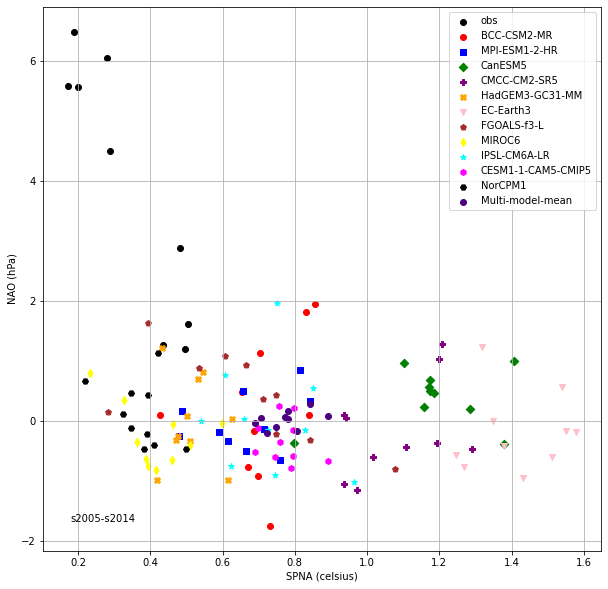

In [33]:
# plot the scatter plot for the bust period
# for all of the models nad the observations
# with the SPNA index on the x-axis
# and the NAO index on the y-axis

# Set up the figure
# only one plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# include gridlines
ax.grid()

# Plot the scatter plot for the bust period
# for the observations
ax.scatter(spna_index_obs_bust, nao_index_obs_bust / 100, label="obs", color="black")

# Set up the model styles
# Set up the model styles
model_styles = {
    "BCC-CSM2-MR": {"marker": "o", "color": "red"},
    "MPI-ESM1-2-HR": {"marker": "s", "color": "blue"},
    "CanESM5": {"marker": "D", "color": "green"},
    "CMCC-CM2-SR5": {"marker": "P", "color": "purple"},
    "HadGEM3-GC31-MM": {"marker": "X", "color": "orange"},
    "EC-Earth3": {"marker": "v", "color": "pink"},
    "FGOALS-f3-L": {"marker": "p", "color": "brown"},
    "MIROC6": {"marker": "d", "color": "yellow"},
    "IPSL-CM6A-LR": {"marker": "*", "color": "cyan"},
    "CESM1-1-CAM5-CMIP5": {"marker": "h", "color": "magenta"},
    "NorCPM1": {"marker": "H", "color": "black"},
    "Multi-model-mean": {"marker": "o", "color": "indigo"}
}

# Create lists to store all members of the multi-model mean
multi_model_data_spna = []
multi_model_data_nao = []

# Loop over the models
for model in dict.tas_models:
    # Extract the years for the model
    long_period_years = nao_stats_dict_tas[model]['years']

    # Find the index of years 2010-2019 in the long period years
    bust_index_start = np.where(long_period_years == 2010)[0][0]
    bust_index_end = np.where(long_period_years == 2019)[0][0]


    # Extract the bust period for the model
    spna_index_model_bust = nao_stats_dict_tas[model]['model_spna'][bust_index_start:bust_index_end+1]

    # Extract the bust period for the model
    nao_index_model_bust = nao_stats_dict_tas[model]['model_nao_ts'][bust_index_start:bust_index_end+1]

    # Append the model bust period data to the multi-model data
    multi_model_data_spna.append(spna_index_model_bust)
    multi_model_data_nao.append(nao_index_model_bust)

    # Plot the scatter plot for the bust period for the model
    ax.scatter(spna_index_model_bust, nao_index_model_bust / 100, label=model, **model_styles[model])

# Convert the lists to arrays
multi_model_data_spna = np.array(multi_model_data_spna)
multi_model_data_nao = np.array(multi_model_data_nao)

# Calculate the multi-model mean
multi_model_mean_bust_spna = np.mean(multi_model_data_spna, axis=0)
multi_model_mean_bust_nao = np.mean(multi_model_data_nao, axis=0)

# Plot the scatter plot for the bust period for the multi-model mean
ax.scatter(multi_model_mean_bust_spna, multi_model_mean_bust_nao / 100, label="Multi-model-mean", **model_styles["Multi-model-mean"])

# set up the y-axis lable
ax.set_ylabel("NAO (hPa)")

# set up the x-axis label
ax.set_xlabel("SPNA (celsius)")

# Include a legend
ax.legend(loc = "upper right")

# Include text in the bottom left corner
ax.text(0.05, 0.05, "s2005-s2014", transform=ax.transAxes, ha = "left",
            va='bottom')

Text(0.05, 0.05, 's1960-s2005')

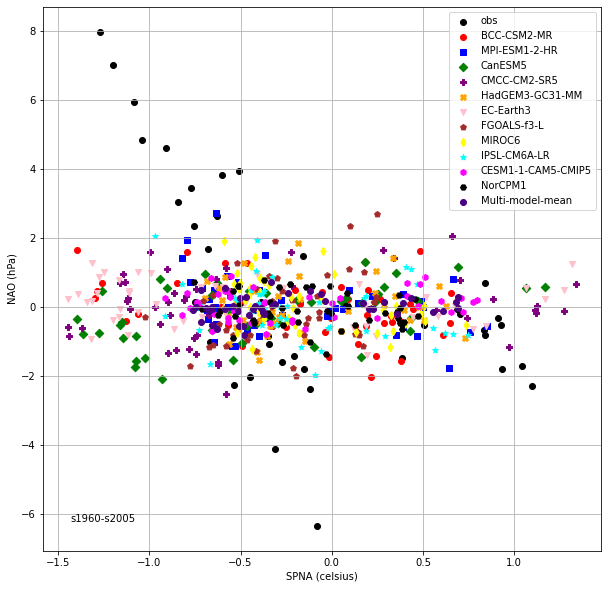

In [24]:
# Do the same thing but for the short period
# Set up the figure
# plot the scatter plot for the bust period
# for all of the models nad the observations
# with the SPNA index on the x-axis
# and the NAO index on the y-axis

# Set up the figure
# only one plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# include gridlines
ax.grid()

# Plot the scatter plot for the bust period
# for the observations
ax.scatter(spna_index_obs_short, nao_index_obs_short / 100, label="obs", color="black")

# Create lists to store all members of the multi-model mean
multi_model_data_spna = []
multi_model_data_nao = []

# Loop over the models
for model in dict.tas_models:
    # Extract the years for the model
    long_period_years = nao_stats_dict_tas[model]['years']

    # Extract the bust period for the model
    spna_index_model_bust = nao_stats_dict_tas[model]['model_spna_short']

    # Extract the bust period for the model
    nao_index_model_bust = nao_stats_dict_tas[model]['model_nao_ts_short']

    # If the model is BCC-CSM2-MR
    if model == "BCC-CSM2-MR":
        # Append the model bust period data to the multi-model data
        multi_model_data_spna.append(spna_index_model_bust)
        multi_model_data_nao.append(nao_index_model_bust)
    else:
        # Append the model bust period data to the multi-model data
        multi_model_data_spna.append(spna_index_model_bust[1:])
        multi_model_data_nao.append(nao_index_model_bust[1:])

    # Plot the scatter plot for the bust period for the model
    ax.scatter(spna_index_model_bust, nao_index_model_bust / 100, label=model, **model_styles[model])

# Convert the lists to arrays
multi_model_data_spna = np.array(multi_model_data_spna)
multi_model_data_nao = np.array(multi_model_data_nao)

# Calculate the multi-model mean
multi_model_mean_bust_spna = np.mean(multi_model_data_spna, axis=0)
multi_model_mean_bust_nao = np.mean(multi_model_data_nao, axis=0)

# Plot the scatter plot for the bust period for the multi-model mean
ax.scatter(multi_model_mean_bust_spna, multi_model_mean_bust_nao / 100, label="Multi-model-mean", **model_styles["Multi-model-mean"])

# set up the y-axis lable
ax.set_ylabel("NAO (hPa)")

# set up the x-axis label
ax.set_xlabel("SPNA (celsius)")

# Include a legend
ax.legend(loc = "upper right")

# Include text in the bottom left corner
ax.text(0.05, 0.05, "s1960-s2005", transform=ax.transAxes, ha = "left",
            va='bottom')

extracting correlation coefficients for BCC-CSM2-MR
extracting correlation coefficients for MPI-ESM1-2-HR
extracting correlation coefficients for CanESM5
extracting correlation coefficients for CMCC-CM2-SR5
extracting correlation coefficients for HadGEM3-GC31-MM
extracting correlation coefficients for EC-Earth3
extracting correlation coefficients for FGOALS-f3-L
extracting correlation coefficients for MIROC6
extracting correlation coefficients for IPSL-CM6A-LR
extracting correlation coefficients for CESM1-1-CAM5-CMIP5
extracting correlation coefficients for NorCPM1
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean
(12,)
(12,)
(12,)


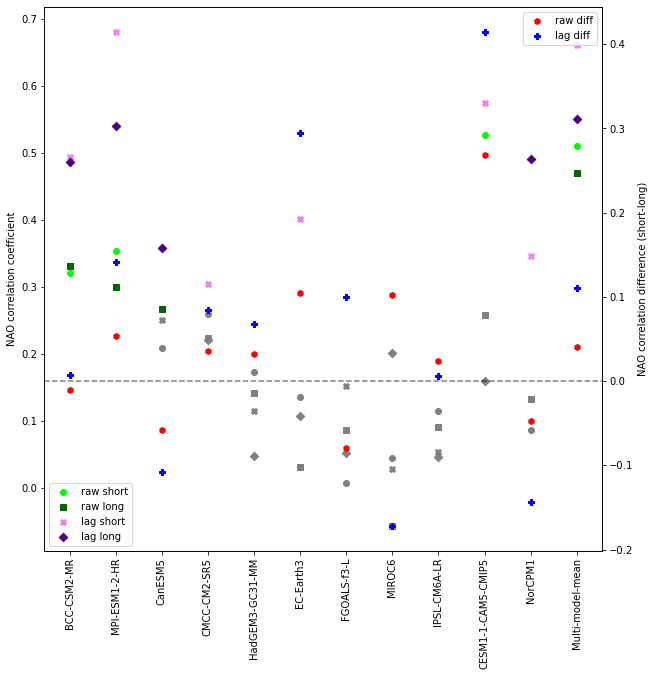

In [46]:
# Create a scatter plot
# With the models on the x-axis (e.g. BCC-CSM2-MR, MPI-ESM1-2-HR, etc.)
# And the correlation coefficient on the y-axis
# For the short period
# and the long period

# Set up the figure
# only one plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# include gridlines
# ax.grid()

# Set up a dictionary for the multi-model mean scores
multi_model_mean_scores = {
    "raw_short": {
        "ACC": 0.51,
        "p": 0.00
    },
    "raw_long": {
        "ACC": 0.47,
        "p": 0.00
    },
    "lag_short": {
        "ACC": 0.66,
        "p": 0.00
    },
    "lag_long": {
        "ACC": 0.55,
        "p": 0.00
    }
}

# Create a list of the models
models_list = dict.tas_models

# Create a list to store all the correlation coefficients for the short period
# For the raw NAO index
corr_coeff_short = [] ;  corr_coeff_long = []

# Also extract the p-values
p_values_short = [] ; p_values_long = []

# Create a list to store all the correlation coefficients for the short period
# For the lagged and variance-adjusted NAO index
corr_coeff_short_lag = [] ; corr_coeff_long_lag = []

# Also extract the p-values
p_values_short_lag = [] ; p_values_long_lag = []

# Create a list for the correlation difference between the short and long periods
corr_diff_short_long = [] ; corr_diff_short_long_lag = []

# Loop over the models
for model in dict.tas_models:
    print(f"extracting correlation coefficients for {model}")

    # Ignore multi-model mean
    if model == "Multi-model-mean":
        continue
    # Extract the corr1 for the short period
    # For the raw NAO index
    corr1_short = nao_stats_dict_tas[model]['corr1_short']

    # And for the long period
    corr1_long = nao_stats_dict_tas[model]['corr1']

    # Extract the corr1 for the short period
    # For the lagged and variance-adjusted NAO index
    corr1_short_lag = nao_stats_dict_tas[model]['corr1_lag_var_adjust_short']

    # And for the long period
    corr1_long_lag = nao_stats_dict_tas[model]['corr1_lag_var_adjust']

    # Extract the p-value for the short period
    # For the raw NAO index
    p_value_short = nao_stats_dict_tas[model]['p1_short']

    # And for the long period
    p_value_long = nao_stats_dict_tas[model]['p1']

    # Extract the p-value for the short period
    # For the lagged and variance-adjusted NAO index
    p_value_short_lag = nao_stats_dict_tas[model]['p1_lag_var_adjust_short']

    # And for the long period
    p_value_long_lag = nao_stats_dict_tas[model]['p1_lag_var_adjust']

    # Extract the model nao time series for the short period
    # For the raw NAO index
    nao_index_model_short = nao_stats_dict_tas[model]['model_nao_ts_short']

    # And for the long period
    nao_index_model_long = nao_stats_dict_tas[model]['model_nao_ts']

    # Extract the model nao time series for the short period
    # For the lagged and variance-adjusted NAO index
    nao_index_model_short_lag = nao_stats_dict_tas[model]['model_nao_ts_lag_var_adjust_short']

    # And for the long period
    nao_index_model_long_lag = nao_stats_dict_tas[model]['model_nao_ts_lag_var_adjust']

    # Calculate the difference between the short and long period
    corr_diff_short_long.append(corr1_short - corr1_long)

    # Calculate the difference between the short and long period
    corr_diff_short_long_lag.append(corr1_short_lag - corr1_long_lag)

    # Append the corr1 for the short period
    # For the raw NAO index
    corr_coeff_short.append(corr1_short) ; corr_coeff_long.append(corr1_long)

    # Append the corr1 for the short period
    # For the lagged and variance-adjusted NAO index
    corr_coeff_short_lag.append(corr1_short_lag) ; corr_coeff_long_lag.append(corr1_long_lag)

    # Append the p-value for the short period
    # For the raw NAO index
    p_values_short.append(p_value_short) ; p_values_long.append(p_value_long)

    # Append the p-value for the short period
    # For the lagged and variance-adjusted NAO index
    p_values_short_lag.append(p_value_short_lag) ; p_values_long_lag.append(p_value_long_lag)

# Convert the lists to arrays
short_coeffs = np.array(corr_coeff_short) ; long_coeffs = np.array(corr_coeff_long)
short_coeffs_lag = np.array(corr_coeff_short_lag) ; long_coeffs_lag = np.array(corr_coeff_long_lag)
short_p_values = np.array(p_values_short) ; long_p_values = np.array(p_values_long)
short_p_values_lag = np.array(p_values_short_lag) ; long_p_values_lag = np.array(p_values_long_lag)
corr_diff_short_long = np.array(corr_diff_short_long) ; corr_diff_short_long_lag = np.array(corr_diff_short_long_lag)

# Append the multi-model mean to the models_list
models_list = ["BCC-CSM2-MR", "MPI-ESM1-2-HR", "CanESM5", "CMCC-CM2-SR5",
                "HadGEM3-GC31-MM", "EC-Earth3", "FGOALS-f3-L", "MIROC6",
                  "IPSL-CM6A-LR", "CESM1-1-CAM5-CMIP5", "NorCPM1",
                    "Multi-model-mean"]

# Add the multi-model mean scores to the lists
short_coeffs = np.append(short_coeffs, multi_model_mean_scores["raw_short"]["ACC"])
long_coeffs = np.append(long_coeffs, multi_model_mean_scores["raw_long"]["ACC"])

# Add the multi-model mean scores to the lists
short_coeffs_lag = np.append(short_coeffs_lag, multi_model_mean_scores["lag_short"]["ACC"])
long_coeffs_lag = np.append(long_coeffs_lag, multi_model_mean_scores["lag_long"]["ACC"])

# Add the multi-model mean scores to the lists
short_p_values = np.append(short_p_values, multi_model_mean_scores["raw_short"]["p"])
long_p_values = np.append(long_p_values, multi_model_mean_scores["raw_long"]["p"])

# Add the multi-model mean scores to the lists
short_p_values_lag = np.append(short_p_values_lag, multi_model_mean_scores["lag_short"]["p"])
long_p_values_lag = np.append(long_p_values_lag, multi_model_mean_scores["lag_long"]["p"])

# Add the multi-model mean scores to the lists
corr_diff_short_long = np.append(corr_diff_short_long, multi_model_mean_scores["raw_short"]["ACC"] - multi_model_mean_scores["raw_long"]["ACC"])
corr_diff_short_long_lag = np.append(corr_diff_short_long_lag, multi_model_mean_scores["lag_short"]["ACC"] - multi_model_mean_scores["lag_long"]["ACC"])

# Plot the scatter plot for the short period
# For the raw NAO index
for model, coeff, p_value in zip(models_list, short_coeffs, short_p_values):
    # set the conditions for the p-value
    color = "lime" if p_value < 0.05 else "gray"

    # only if the loop is on the first model
    if model == models_list[0]:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="o", label="raw short")
    else:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="o")

# Plot the scatter plot for the long period
# For the raw NAO index
for model, coeff, p_value in zip(models_list, long_coeffs, long_p_values):
    # set the conditions for the p-value
    color = "darkgreen" if p_value < 0.05 else "gray"

    if model == models_list[0]:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="s", label="raw long")
    else:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="s")

# Plot the scatter plot for the short period
# For the lagged and variance-adjusted NAO index
for model, coeff, p_value in zip(models_list, short_coeffs_lag, short_p_values_lag):
    # set the conditions for the p-value
    color = "violet" if p_value < 0.05 else "gray"

    if model == models_list[0]:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="X", label="lag short")
    else:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="X")

# Plot the scatter plot for the long period
# For the lagged and variance-adjusted NAO index
for model, coeff, p_value in zip(models_list, long_coeffs_lag, long_p_values_lag):
    # set the conditions for the p-value
    color = "indigo" if p_value < 0.05 else "gray"

    if model == models_list[0]:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="D", label="lag long")
    else:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="D")

# Edit the x-axis ticks
plt.xticks(rotation=90)

# Create a twin axes
ax2 = ax.twinx()

# print the shapes here
print(np.shape(models_list))
print(np.shape(corr_diff_short_long))
print(np.shape(corr_diff_short_long_lag))

# Plot the correlation difference between the short and long periods
# For the raw NAO index
ax2.scatter(models_list, corr_diff_short_long, color="red", marker="h", label="raw diff")

# Plot the correlation difference between the short and long periods
# For the lagged and variance-adjusted NAO index
ax2.scatter(models_list, corr_diff_short_long_lag, color="blue", marker="P", label="lag diff")

# Include a thin, dashed line at 0
ax2.axhline(0, linestyle="--", color="black", alpha=0.5)

# Set up the y-axis label
ax.set_ylabel("NAO correlation coefficient")

# Set up the y-axis label
ax2.set_ylabel("NAO correlation difference (short-long)")

# Include a legend
ax.legend(loc = "lower left")

# Include a legend
ax2.legend(loc = "upper right")

extracting correlation coefficients for BCC-CSM2-MR
extracting correlation coefficients for MPI-ESM1-2-HR
extracting correlation coefficients for CanESM5
extracting correlation coefficients for CMCC-CM2-SR5
extracting correlation coefficients for HadGEM3-GC31-MM
extracting correlation coefficients for EC-Earth3
extracting correlation coefficients for FGOALS-f3-L
extracting correlation coefficients for MIROC6
extracting correlation coefficients for IPSL-CM6A-LR
extracting correlation coefficients for CESM1-1-CAM5-CMIP5
extracting correlation coefficients for NorCPM1
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean


(11,)
(12,)
(12,)
(12,)
(12,)


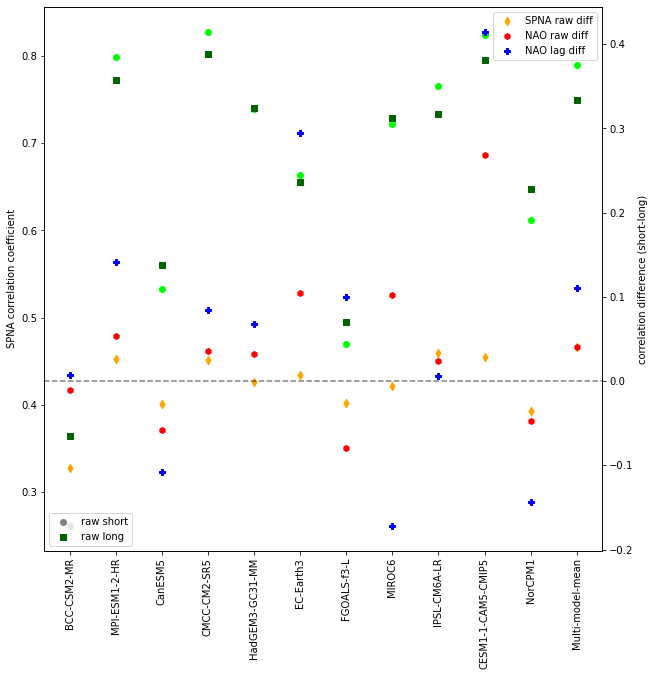

In [58]:
# now do the same thing but for the SPNA index
# Create a scatter plot

# Set up the figure
# only one plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# set up a dictionary for the multi-model mean scores
# Lag ones aren't lagged
# they just skip over the first 3 years
multi_model_mean_scores_spna = {
    "raw_short": {
        "ACC": 0.79,
        "p": 0.00
    },
    "raw_long": {
        "ACC": 0.75,
        "p": 0.00
    },
    "lag_short": {
        "ACC": 0.84,
        "p": 0.00
    },
    "lag_long": {
        "ACC": 0.80,
        "p": 0.00
    }
}

# Create a list of the models
# Append the multi-model mean to the models_list
models_list = ["BCC-CSM2-MR", "MPI-ESM1-2-HR", "CanESM5", "CMCC-CM2-SR5",
                "HadGEM3-GC31-MM", "EC-Earth3", "FGOALS-f3-L", "MIROC6",
                  "IPSL-CM6A-LR", "CESM1-1-CAM5-CMIP5", "NorCPM1",
                    "Multi-model-mean"]

# Create a list to store all the correlation coefficients for the short period
# For the raw SPNA index
corr_coeff_short = [] ;  corr_coeff_long = []

# Also extract the p-values
p_values_short = [] ; p_values_long = []

# Create a list for the difference between the short and long periods
corr_diff_short_long_spna = []

# Create a list for the difference between the short and long periods NAO
corr_diff_short_long_nao = [] ; corr_diff_short_long_nao_lag = []

# Loop over the models
for model in dict.tas_models:
    print(f"extracting correlation coefficients for {model}")

    # Ignore multi-model mean
    if model == "Multi-model-mean":
        continue
    # Extract the corr1 for the short period
    # For the raw SPNA index
    corr1_short = nao_stats_dict_tas[model]['corr1_spna_short']

    # And for the long period
    corr1_long = nao_stats_dict_tas[model]['corr1_spna']

    # Extract the NAO corr1 for the short period
    # For the raw SPNA index
    corr1_short_nao = nao_stats_dict_tas[model]['corr1_short']

    # And for the long period
    corr1_long_nao = nao_stats_dict_tas[model]['corr1']

    # Extract the NAO corr1 for the short period
    # For the lagged and variance-adjusted NAO index
    corr1_short_nao_lag = nao_stats_dict_tas[model]['corr1_lag_var_adjust_short']

    # And for the long period
    corr1_long_nao_lag = nao_stats_dict_tas[model]['corr1_lag_var_adjust']

    # Extract the p-value for the short period
    # For the raw SPNA index
    p_value_short = nao_stats_dict_tas[model]['p1_spna_short']

    # And for the long period
    p_value_long = nao_stats_dict_tas[model]['p1_spna']

    # Calculate the difference between the short and long period
    corr_diff_short_long_spna = np.append(corr_diff_short_long_spna, corr1_short - corr1_long)

    # Calculate the difference between the short and long period
    corr_diff_short_long_nao = np.append(corr_diff_short_long_nao, corr1_short_nao - corr1_long_nao)

    # Calculate the difference between the short and long period
    corr_diff_short_long_nao_lag = np.append(corr_diff_short_long_nao_lag, corr1_short_nao_lag - corr1_long_nao_lag)

    # Append the corr1 for the short period
    # For the raw SPNA index
    corr_coeff_short = np.append(corr_coeff_short, corr1_short) ; corr_coeff_long = np.append(corr_coeff_long, corr1_long)

    # Append the p-value for the short period
    # For the raw SPNA index
    p_values_short = np.append(p_values_short, p_value_short) ; p_values_long = np.append(p_values_long, p_value_long)

print(np.shape(corr_diff_short_long_spna))

# Convert the lists to arrays
short_coeffs = np.array(corr_coeff_short) ; long_coeffs = np.array(corr_coeff_long)
short_p_values = np.array(p_values_short) ; long_p_values = np.array(p_values_long)
corr_diff_short_long_spna = np.array(corr_diff_short_long_spna)
corr_diff_short_long_nao = np.array(corr_diff_short_long_nao)
corr_diff_short_long_nao_lag = np.array(corr_diff_short_long_nao_lag)

# Add the multi-model mean scores to the lists
short_coeffs = np.append(short_coeffs, multi_model_mean_scores_spna["raw_short"]["ACC"])
long_coeffs = np.append(long_coeffs, multi_model_mean_scores_spna["raw_long"]["ACC"])

# Add the multi-model mean scores to the lists
short_p_values = np.append(short_p_values, multi_model_mean_scores_spna["raw_short"]["p"])
long_p_values = np.append(long_p_values, multi_model_mean_scores_spna["raw_long"]["p"])

# Add the multi-model mean scores to the lists for the SPNA index
corr_diff_short_long_spna = np.append(corr_diff_short_long_spna, multi_model_mean_scores_spna["raw_short"]["ACC"] - multi_model_mean_scores_spna["raw_long"]["ACC"])

# And for the NAO
corr_diff_short_long_nao = np.append(corr_diff_short_long_nao, multi_model_mean_scores["raw_short"]["ACC"] - multi_model_mean_scores["raw_long"]["ACC"])
corr_diff_short_long_nao_lag = np.append(corr_diff_short_long_nao_lag, multi_model_mean_scores["lag_short"]["ACC"] - multi_model_mean_scores["lag_long"]["ACC"])

# Plot the scatter plot for the short period
# For the raw SPNA index
for model, coeff, p_value in zip(models_list, short_coeffs, short_p_values):
    # set the conditions for the p-value
    color = "lime" if p_value < 0.05 else "gray"

    # only if the loop is on the first model
    if model == models_list[0]:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="o", label="raw short")
    else:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="o")

# Plot the scatter plot for the long period
# For the raw SPNA index
for model, coeff, p_value in zip(models_list, long_coeffs, long_p_values):
    # set the conditions for the p-value
    color = "darkgreen" if p_value < 0.05 else "gray"

    if model == models_list[0]:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="s", label="raw long")
    else:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="s")

# Edit the x-axis ticks
plt.xticks(rotation=90)

# Create a twin axes
ax2 = ax.twinx()

print(np.shape(models_list))
print(np.shape(corr_diff_short_long_spna))
print(np.shape(corr_diff_short_long_nao))
print(np.shape(corr_diff_short_long_nao_lag))

# Plot the correlation difference between the short and long periods
# For the raw SPNA index
ax2.scatter(models_list, corr_diff_short_long_spna, color="orange", marker="d", label="SPNA raw diff")

# Plot the correlation difference between the short and long periods
# For the raw NAO index
ax2.scatter(models_list, corr_diff_short_long_nao, color="red", marker="h", label="NAO raw diff")

# Plot the correlation difference between the short and long periods
# For the lagged and variance-adjusted NAO index
ax2.scatter(models_list, corr_diff_short_long_nao_lag, color="blue", marker="P", label="NAO lag diff")

# Include a thin, dashed line at 0
ax2.axhline(0, linestyle="--", color="black", alpha=0.5)

# Set up the y-axis label
ax.set_ylabel("SPNA correlation coefficient")

# Set up the y-axis label
ax2.set_ylabel("correlation difference (short-long)")

# Include a legend
ax.legend(loc = "lower left")

# Include a legend
ax2.legend(loc = "upper right")

extracting correlation coefficients for BCC-CSM2-MR
extracting correlation coefficients for MPI-ESM1-2-HR
extracting correlation coefficients for CanESM5
extracting correlation coefficients for CMCC-CM2-SR5
extracting correlation coefficients for HadGEM3-GC31-MM
extracting correlation coefficients for EC-Earth3
extracting correlation coefficients for FGOALS-f3-L
extracting correlation coefficients for MIROC6
extracting correlation coefficients for IPSL-CM6A-LR
extracting correlation coefficients for CESM1-1-CAM5-CMIP5
extracting correlation coefficients for NorCPM1
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean
extracting correlation coefficients for Multi-model-mean


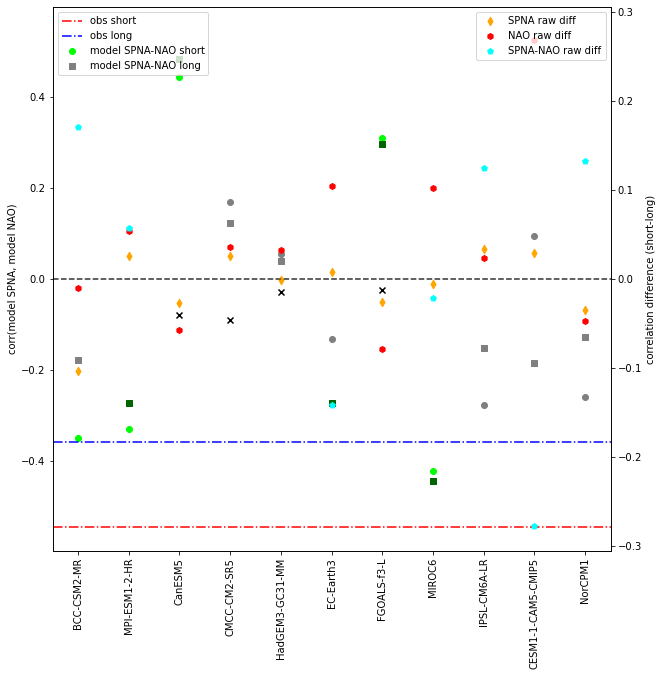

In [77]:
# Create a plot of the correlation differences
# and the strength of the correlation between the model SPNA index
# and the model NAO index
# x-axis: models (including multi-model mean)
# y-axis1: corr(model SPNA, model NAO) for the short period and long period
# y-axis2: corr difference (short-long) for the SPNA index and the NAO 
# and the correlation difference for the NAO and SPNA indices

# Set up the figure
# only one plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Extract the obs correlation
# between the SPNA and NAO indices
# for the short period
corr_obs_short = nao_stats_dict_tas["BCC-CSM2-MR"]['corr_spna_nao_short_obs']
corr_obs = nao_stats_dict_tas["BCC-CSM2-MR"]['corr_spna_nao_obs']

# Plot these values as horizontal lines
ax.axhline(corr_obs_short, linestyle="-.", color="red", label="obs short")
ax.axhline(corr_obs, linestyle="-.", color="blue", label="obs long")

# Create a list to store all the correlation coefficients for the short period
corr_nao_spna_model_short = [] ; corr_nao_spna_model_long = []

# also extract the p-values
p_values_nao_spna_model_short = [] ; p_values_nao_spna_model_long = []

# Create a list for the difference between the short and long periods
# for the SPNA index
corr_diff_short_long_spna = []

# Create a list for the difference between the short and long periods NAO
corr_diff_short_long_nao = []

# Create a list for the difference between the short and long periods
# for the corr(model SPNA, model NAO)
corr_diff_short_long_nao_spna = []

# Loop over the models
for model in dict.tas_models:
    print(f"extracting correlation coefficients for {model}")

    # Ignore multi-model mean
    if model == "Multi-model-mean":
        continue

    # Extract the corr1 for the short period
    # for the corr(model SPNA, model NAO)
    corr_nao_spna_short = (nao_stats_dict_tas[model]['corr_spna_nao_short_model'])

    # And for the long period
    corr_nao_spna = (nao_stats_dict_tas[model]['corr_spna_nao_model'])

    # Extract the p-value for the short period
    # for the corr(model SPNA, model NAO)
    p_value_nao_spna_short = nao_stats_dict_tas[model]['p_spna_nao_short_model']

    # And for the long period
    p_value_nao_spna = nao_stats_dict_tas[model]['p_spna_nao_model']

    # Check if both correlations are negative
    if corr_nao_spna_short < 0 and corr_nao_spna < 0:
        corr_nao_spna_diff = np.abs(corr_nao_spna_short) - np.abs(corr_nao_spna)
    # if one is negative and the other is positive
    elif corr_nao_spna < corr_nao_spna_short:
        corr_nao_spna_diff = -(corr_nao_spna_short - corr_nao_spna)
    elif corr_nao_spna > corr_nao_spna_short:
        corr_nao_spna_diff = corr_nao_spna_short - corr_nao_spna
    else:
        raise ValueError("Something went wrong")

    # Calculate the difference between the short and long period
    corr_diff_short_long_nao_spna = np.append(corr_diff_short_long_nao_spna,
                                              corr_nao_spna_diff) 

    # Append the corr1 for the short period
    # for the corr(model SPNA, model NAO)
    corr_nao_spna_model_short = np.append(corr_nao_spna_model_short, corr_nao_spna_short)

    # Append the corr1 for the long period
    # for the corr(model SPNA, model NAO)
    corr_nao_spna_model_long = np.append(corr_nao_spna_model_long, corr_nao_spna)

    # Append the p-value for the short period
    # for the corr(model SPNA, model NAO)
    p_values_nao_spna_model_short = np.append(p_values_nao_spna_model_short, p_value_nao_spna_short)

    # Append the p-value for the long period
    # for the corr(model SPNA, model NAO)
    p_values_nao_spna_model_long = np.append(p_values_nao_spna_model_long, p_value_nao_spna)

    # Calculate the correlation difference between the short and long periods
    # for the spna index
    corr_diff_short_long_spna = np.append(corr_diff_short_long_spna,
                                           nao_stats_dict_tas[model]['corr1_spna_short'] - nao_stats_dict_tas[model]['corr1_spna'])
    
    # Calculate the correlation difference between the short and long periods
    # for the nao index
    corr_diff_short_long_nao = np.append(corr_diff_short_long_nao,
                                           nao_stats_dict_tas[model]['corr1_short'] - nao_stats_dict_tas[model]['corr1'])

# Convert the lists to arrays
corr_nao_spna_model_short = np.array(corr_nao_spna_model_short) ; corr_nao_spna_model_long = np.array(corr_nao_spna_model_long)
p_values_nao_spna_model_short = np.array(p_values_nao_spna_model_short) ; p_values_nao_spna_model_long = np.array(p_values_nao_spna_model_long)
corr_diff_short_long_spna = np.array(corr_diff_short_long_spna)
corr_diff_short_long_nao = np.array(corr_diff_short_long_nao)
corr_diff_short_long_nao_spna = np.array(corr_diff_short_long_nao_spna)

# TODO: We haven't yet calculated the multi-model mean for the corr(model SPNA, model NAO)

# Plot the scatter plot for the short period
# for the corr(model SPNA, model NAO)
for model, coeff, p_value in zip(models_list, corr_nao_spna_model_short, p_values_nao_spna_model_short):
    # set the conditions for the p-value
    color = "lime" if p_value < 0.05 else "gray"

    # only if the loop is on the first model
    if model == models_list[0] and color != "gray":
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="o", label="model SPNA-NAO short")
    else:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="o")

# Plot the scatter plot for the long period
# for the corr(model SPNA, model NAO)
for model, coeff, p_value in zip(models_list, corr_nao_spna_model_long, p_values_nao_spna_model_long):
    # set the conditions for the p-value
    color = "darkgreen" if p_value < 0.05 else "gray"

    if model == models_list[0]:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="s", label="model SPNA-NAO long")
    else:
        # Plot the scatter plot for the short period
        ax.scatter(model, coeff, color=color, marker="s")

# Edit the x-axis ticks
plt.xticks(rotation=90)

# Create a twin axes
ax2 = ax.twinx()

tas_models = ["BCC-CSM2-MR", "MPI-ESM1-2-HR", "CanESM5", "CMCC-CM2-SR5",
                "HadGEM3-GC31-MM", "EC-Earth3", "FGOALS-f3-L", "MIROC6",
                  "IPSL-CM6A-LR", "CESM1-1-CAM5-CMIP5", "NorCPM1"]

# Plot the correlation difference between the short and long periods
# for the SPNA index
ax2.scatter(tas_models, corr_diff_short_long_spna, color="orange", marker="d", label="SPNA raw diff")

# Plot the correlation difference between the short and long periods
# for the NAO index
ax2.scatter(tas_models, corr_diff_short_long_nao, color="red", marker="h", label="NAO raw diff")

# Loop over the models
for model, coeff1, coeff2, coeff_diff in zip(tas_models, corr_nao_spna_model_short, corr_nao_spna_model_long, corr_diff_short_long_nao_spna):
    # if both coeff1 and coeff2 are +ve
    color = "black" if coeff1 > 0 and coeff2 > 0 else "cyan"
    marker = "x" if coeff1 > 0 and coeff2 > 0 else "p"

    # if model is the first one
    if model == tas_models[0]:
        # Plot the scatter plot for the short period
        ax2.scatter(model, coeff_diff, color=color, marker=marker, label="SPNA-NAO raw diff")
    else:
        # Plot the scatter plot for the short period
        ax2.scatter(model, coeff_diff, color=color, marker=marker)


# Include a thin, dashed line at 0
ax.axhline(0, linestyle="--", color="black", alpha=0.5)

# Include a thin, dashed line at 0
ax2.axhline(0, linestyle="--", color="black", alpha=0.5)

# Set up the y-axis label
ax.set_ylabel("corr(model SPNA, model NAO)")

# Set up the y-axis label
ax2.set_ylabel("correlation difference (short-long)")

# Get the maximum absolute value of the data on the first y-axis
max_abs_y1 = max(abs(min(ax.get_ylim())), abs(max(ax.get_ylim())))

# Get the maximum absolute value of the data on the second y-axis
max_abs_y2 = max(abs(min(ax2.get_ylim())), abs(max(ax2.get_ylim())))

# Calculate the ratio of the maximum absolute values
ratio = max_abs_y1 / max_abs_y2

# Adjust the limits of the y-axes
ax.set_ylim(-max_abs_y1, max_abs_y1)
ax2.set_ylim(-max_abs_y1 / ratio, max_abs_y1 / ratio)

# Include a legend
ax.legend(loc = "upper left")

# Include a legend
ax2.legend(loc = "upper right")

In [ ]:
color = "black" if coeff1 > 0 and coeff2 > 0 else "gray"
marker = "x" if coeff1 > 0 and coeff2 > 0 else "o"